# Regression with Regularization and Cross Validation. Predicting Prices of Diamonds

### Adrian P. Bustamante
### email: adrianpebus@gmail.com

#### Table of Contents
[1.Objective](#objective)

[2.About the Data](#about)

[3. EDA and Feature Engineering](#eda)

[4. Regression Models, Regularization, Cross Validation](#regression)

[5. Summary of results](#results)

[6. Conclusion](#conclusion)

## 1. Objective <a class ='anchor' id='objective'></a>

The objective of this project is to find the best regression model that can predict the price of diamons given the features of the data. The regression models that are going to be tested are: regression, ridge regression, lasso regression, elastic net. Moreover, to find the best hyperparameters ( degree of the polynomial regression and the hyperparameters for the regularizations) we will be doing cross-validation.


## 2. About the Data <a class='anchor' id="about"></a>

This dataset is related to diamonds, containing information on various attributes of diamonds. Here's a breakdown of the columns:
1. carat: The weight of the diamond, measured in carats (a unit of mass used for gemstones).
2. cut: Describes the quality of the cut of the diamond. This is likely a categorical variable with different levels such as 'Fair', 'Good', 'Very Good', 'Premium', and 'Ideal'.
3. color: Represents the color grade of the diamond. This could be a categorical variable indicating the color, with levels like 'D' (colorless), 'E', 'F', 'G', 'H', 'I', 'J' (near colorless), etc.
4. clarity: Indicates the clarity of the diamond, referring to the presence of internal flaws or inclusions. This is also likely a categorical variable with levels such as 'IF' (internally flawless), 'VVS1', 'VVS2' (very, very slightly included), 'VS1', 'VS2' (very slightly included), 'SI1', 'SI2' (slightly included), and 'I1', 'I2', 'I3' (included).
5. depth: Represents the depth percentage of the diamond, calculated as the height of the diamond divided by its average diameter.
6. table: Refers to the width of the diamond's table expressed as a percentage of the average diameter.
7. price: The price of the diamond in USD.
8. x: Length of the diamond in mm.
9. y: Width of the diamond in mm.
10. z: Depth of the diamond in mm.

The dataset consists of 53,940 entries with no missing values across these 10 columns. It seems well-prepared for analysis, with various numerical and categorical variables providing a comprehensive view of diamond attributes. 

The dataset can be found at kaggle following the link below:

https://www.kaggle.com/datasets/rohit265/diamonds-dataset/data

In [1]:
#!pip3 install -U kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohit265/diamonds-dataset")

print("Path to dataset files:", path)


Path to dataset files: /home/adrian/.cache/kagglehub/datasets/rohit265/diamonds-dataset/versions/1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('dark_background')

In [4]:
data = pd.read_json(path + '/diamonds_dataset.json')
df = data.copy()
df

carat          cut color clarity  depth  table  price     x     y     z
0       0.23        Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21      Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23         Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29      Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31         Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...          ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72        Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72         Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  'Very Good'     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86      Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75        Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

## 3. EDA and Feature Engineering  <a class='anchor' id='eda'></a>

##### Eploring the data

In [5]:
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [7]:
for column in df.columns[df.dtypes == object]:
    print(df[column].value_counts())

cut
Ideal          21551
Premium        13791
'Very Good'    12082
Good            4906
Fair            1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


#### Dealing with duplicated values

In [8]:
df[df.duplicated()]

carat    cut color clarity  depth  table  price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]

In [9]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()] ### there is no duplicates anymore

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

In [10]:
cat_cols = df.columns[ df.dtypes == object ]
num_cols = df.columns[ df.dtypes != object ]

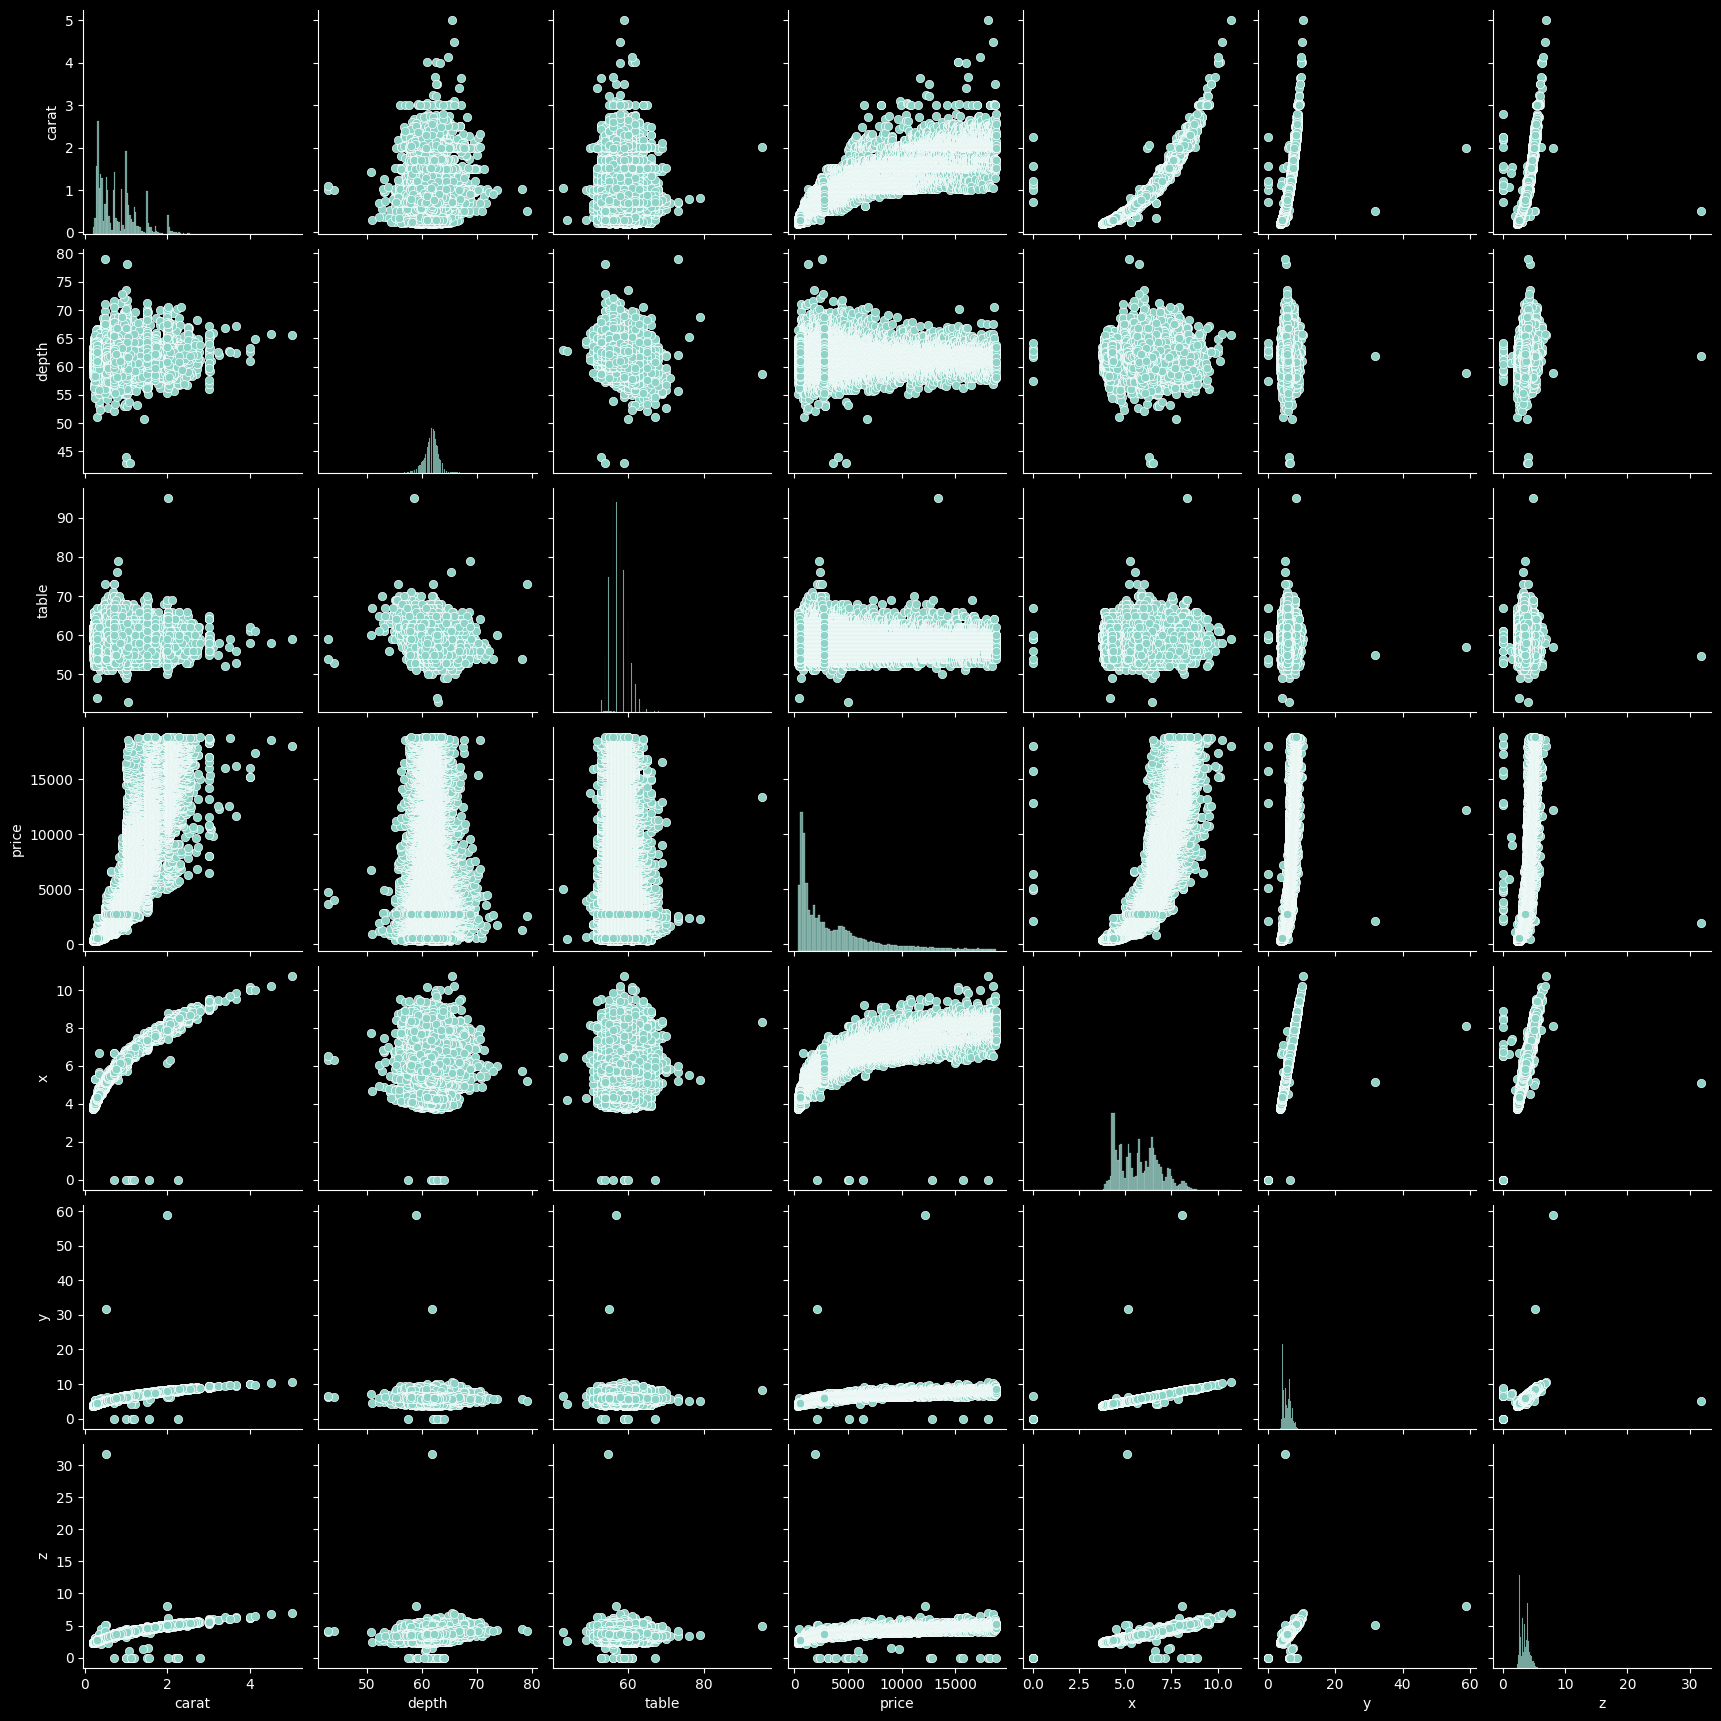

In [11]:
sns.pairplot(data = df[num_cols])

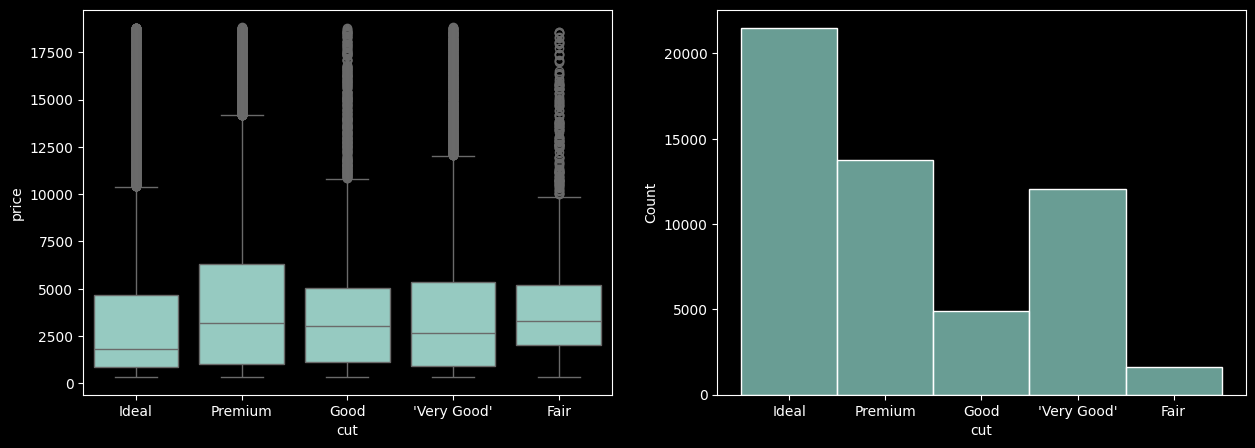

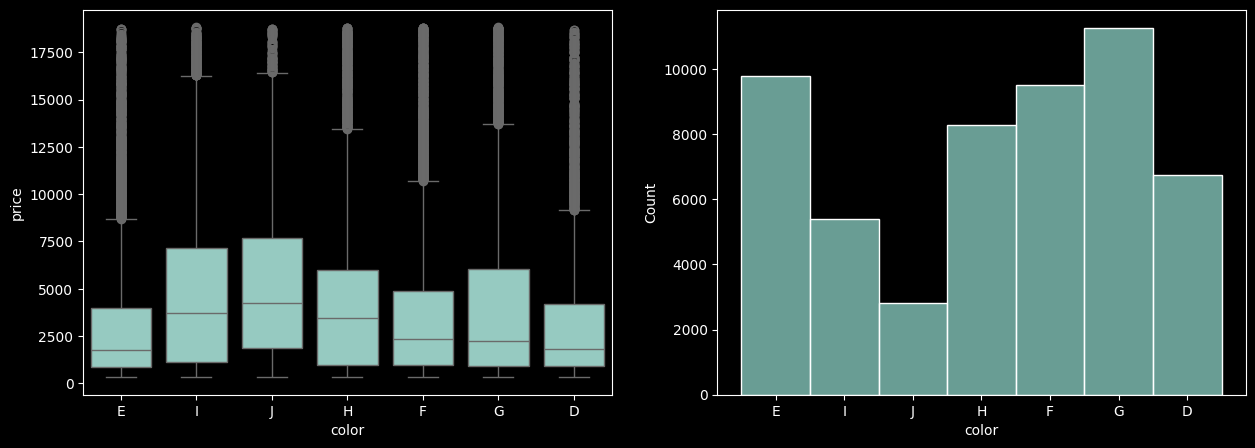

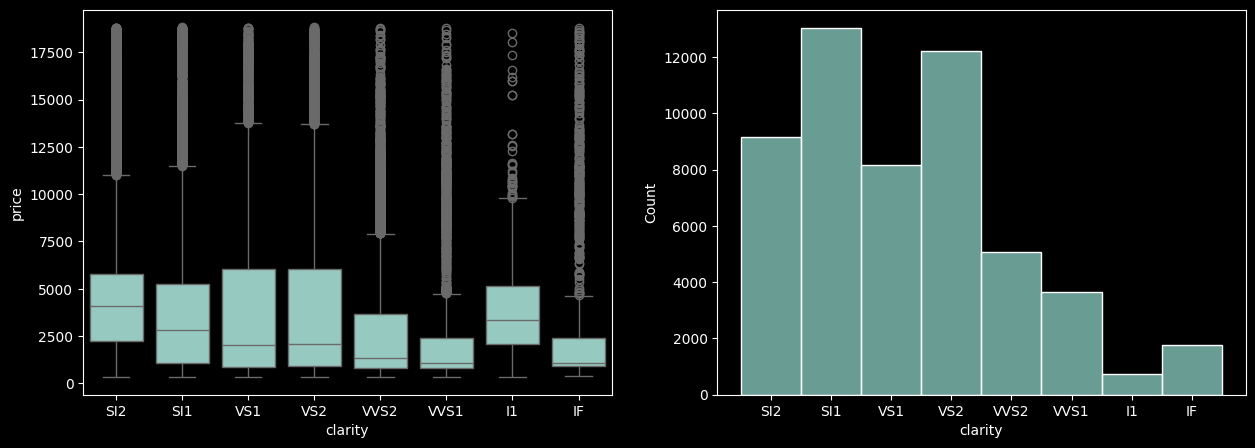

In [12]:
for column in cat_cols:
    fig, (ax1, ax2) = plt.subplots(figsize =(15,5), ncols=2, sharey=False)
    sns.boxplot(data = df, x =column, y='price', ax=ax1)
    sns.histplot(data = df, x =column, ax=ax2)
    plt.show()

#### One hot encoding

In [13]:
df_ohe = pd.get_dummies(data =df, columns= cat_cols, dtype=float)
df_ohe.head(2)

carat  depth  table  price     x     y     z  cut_'Very Good'  cut_Fair  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43              0.0       0.0   
1   0.21   59.8   61.0    326  3.89  3.84  2.31              0.0       0.0   

   cut_Good  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0       0.0  ...      0.0      0.0         0.0         0.0          0.0   
1       0.0  ...      0.0      0.0         0.0         0.0          1.0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0          1.0          0.0          0.0           0.0           0.0  
1          0.0          0.0          0.0           0.0           0.0  

[2 rows x 27 columns]

In [14]:
df_ohe.rename(columns={"cut_'Very Good'":'cut_very_good'}, inplace=True)
df_ohe.head(2)

carat  depth  table  price     x     y     z  cut_very_good  cut_Fair  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43            0.0       0.0   
1   0.21   59.8   61.0    326  3.89  3.84  2.31            0.0       0.0   

   cut_Good  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0       0.0  ...      0.0      0.0         0.0         0.0          0.0   
1       0.0  ...      0.0      0.0         0.0         0.0          1.0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0          1.0          0.0          0.0           0.0           0.0  
1          0.0          0.0          0.0           0.0           0.0  

[2 rows x 27 columns]

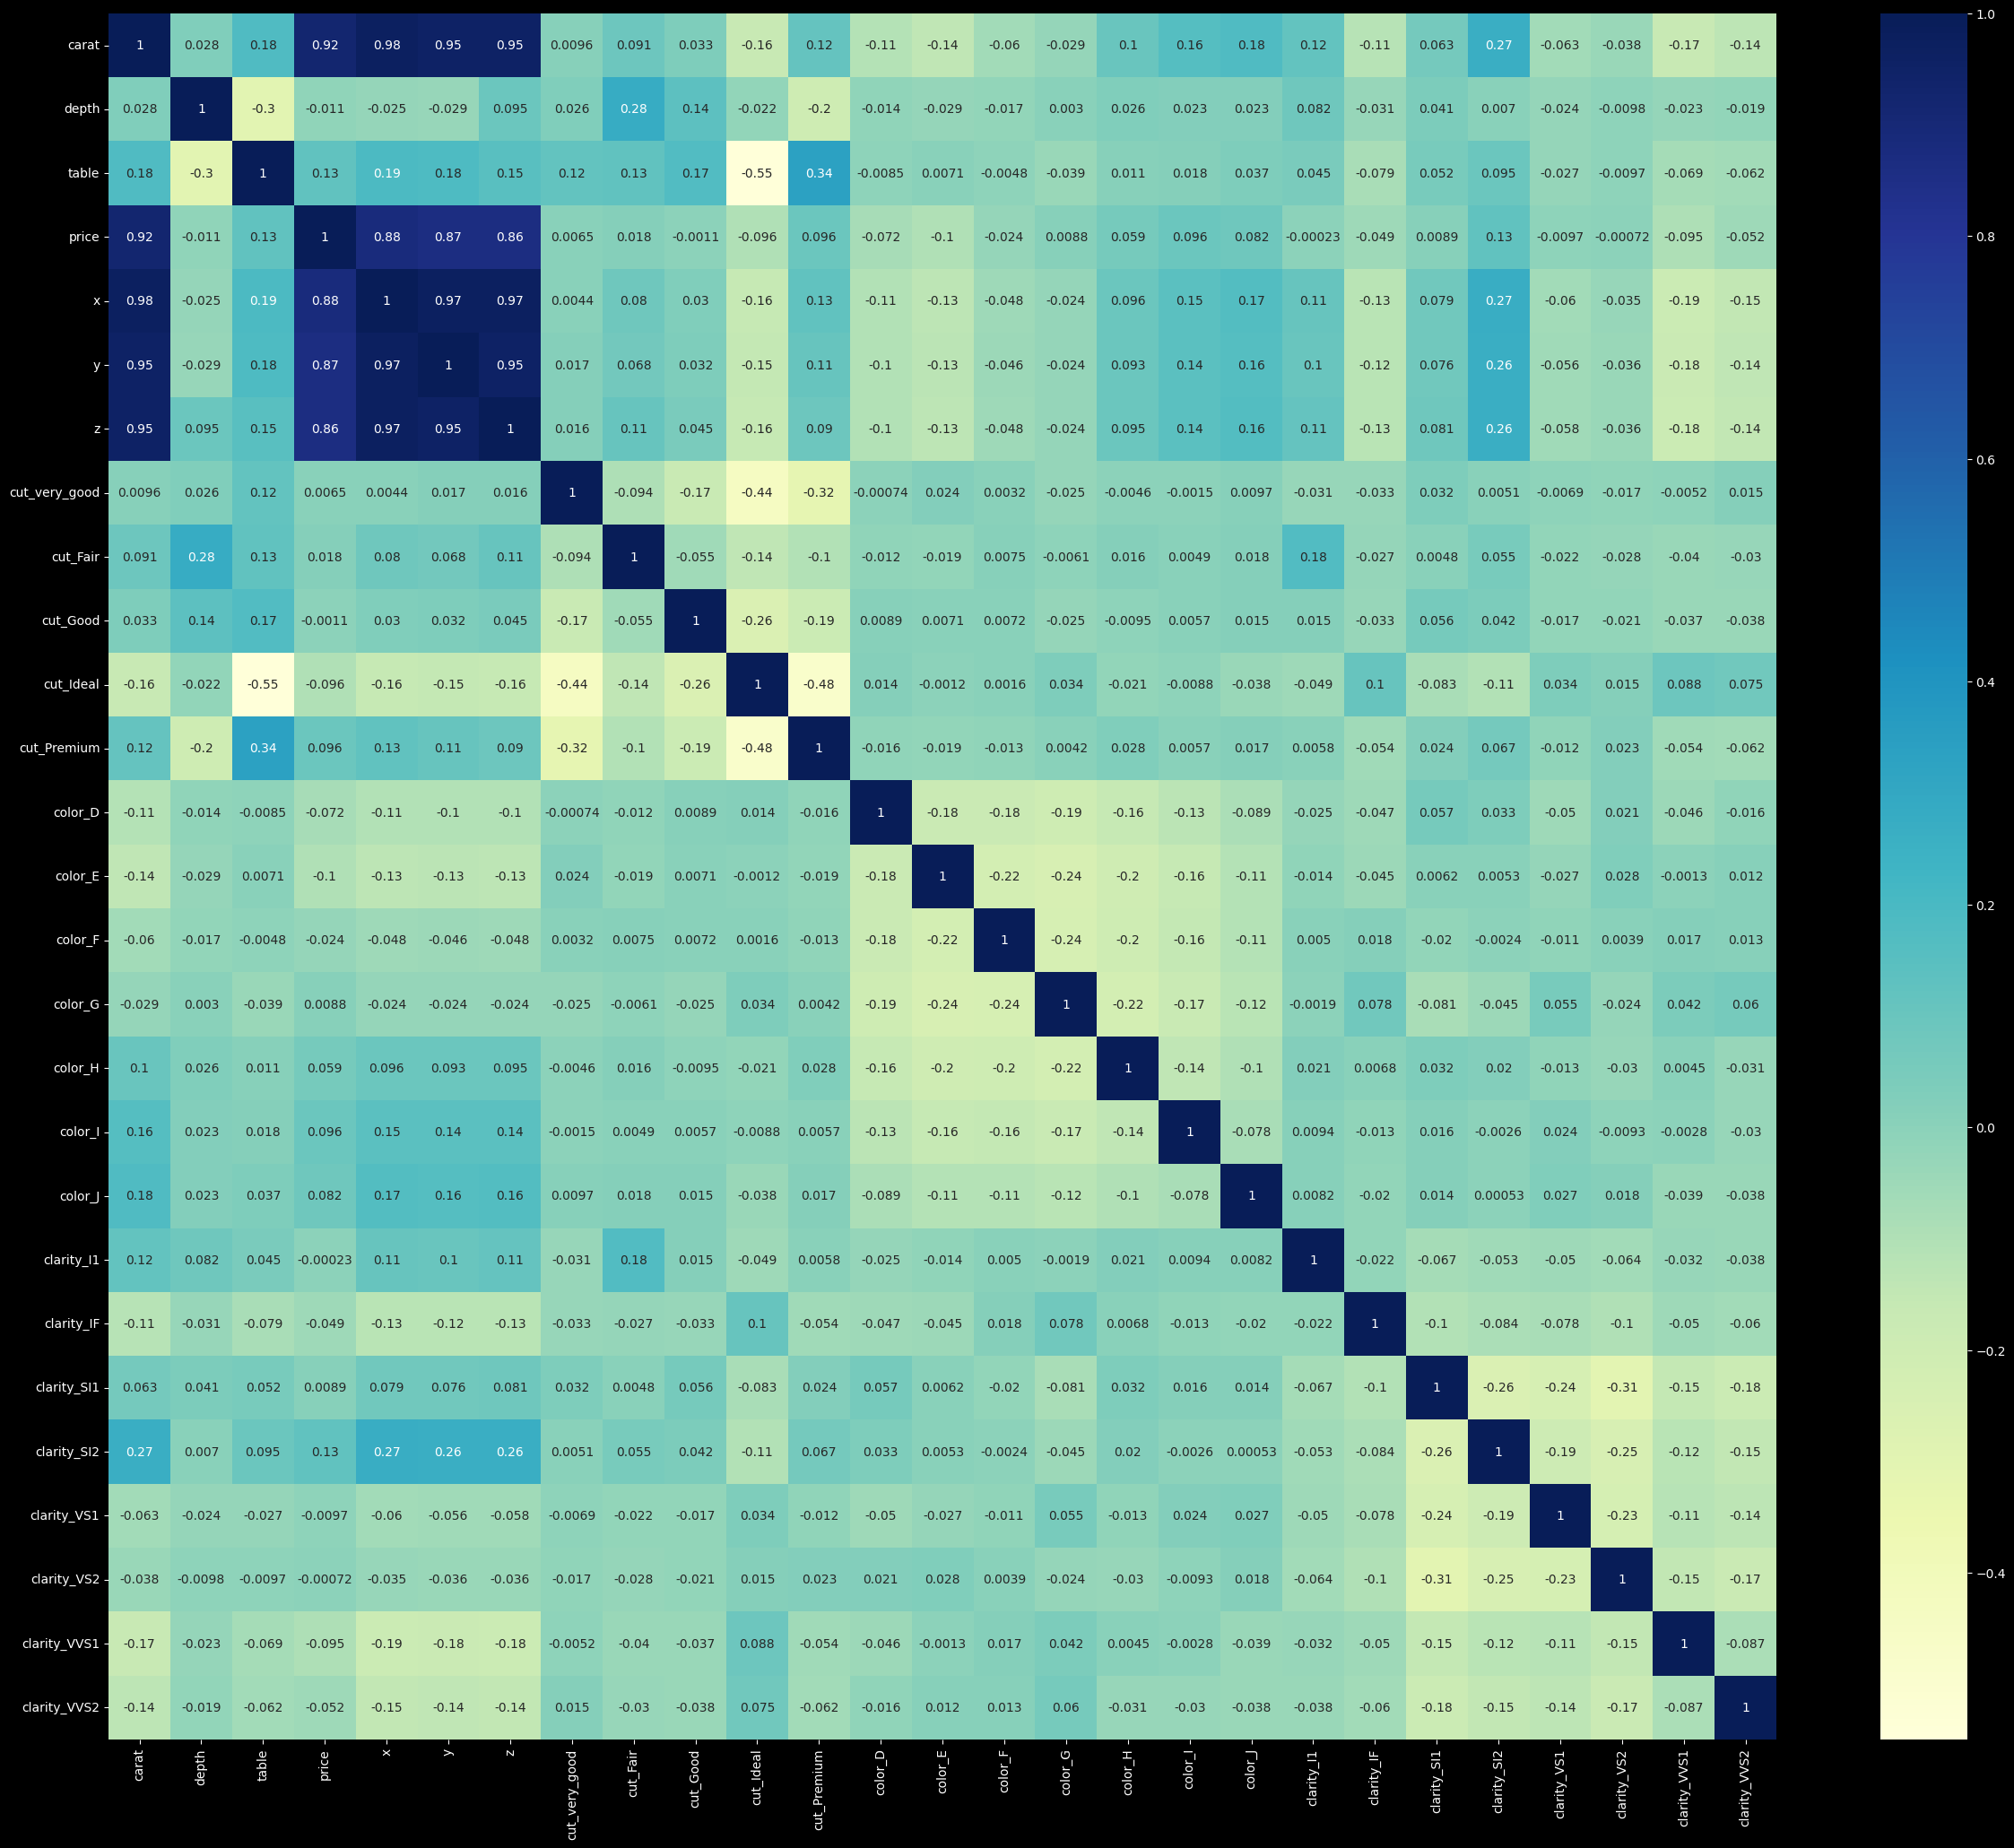

In [15]:
plt.figure(figsize=(30,25))
sns.heatmap(df_ohe.corr(), annot=True, cmap ='YlGnBu')
plt.show()

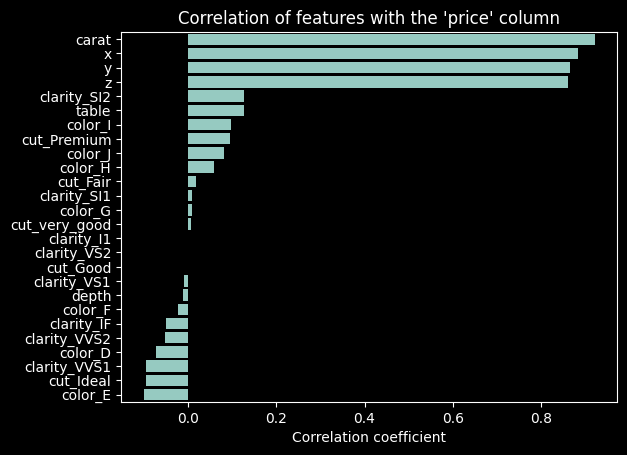

In [16]:
ax = plt.gca()
sns.barplot(df_ohe.corr()['price'].sort_values(ascending=False).drop('price'), orient='h')
#sns.barplot(df_ohe.corr()['price'].sort_values(ascending=False).drop('price'))
#df_ohe.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar')
plt.title("Correlation of features with the 'price' column")
plt.xlabel('Correlation coefficient')
#plt.xticks(rotation=90)
plt.show()

#### Testing normality of the independent variable

In [17]:
## Separating features from target variable
X = df_ohe.drop('price', axis=1).copy()
y = df_ohe['price'].astype(float).copy()
df_ohe.shape, X.shape, y.shape

((53794, 27), (53794, 26), (53794,))

In [18]:

def chart_price_normal(y_target):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style

    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn

    fig = plt.figure(constrained_layout =True, figsize=(12,8))

    #creating a grid
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    ##customizin the histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(y_target, norm_hist=True, ax =ax1)
    plt.xlabel('price')

    #customizing the QQ_plot
    ax2 = fig.add_subplot(grid[1,:2])
    ax2.set_title('QQ_plot')
    stats.probplot(y_target, plot= ax2)

    #customizing the boxplot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot Price')
    sns.boxplot(y_target, orient='v', ax=ax3)

    plt.show()

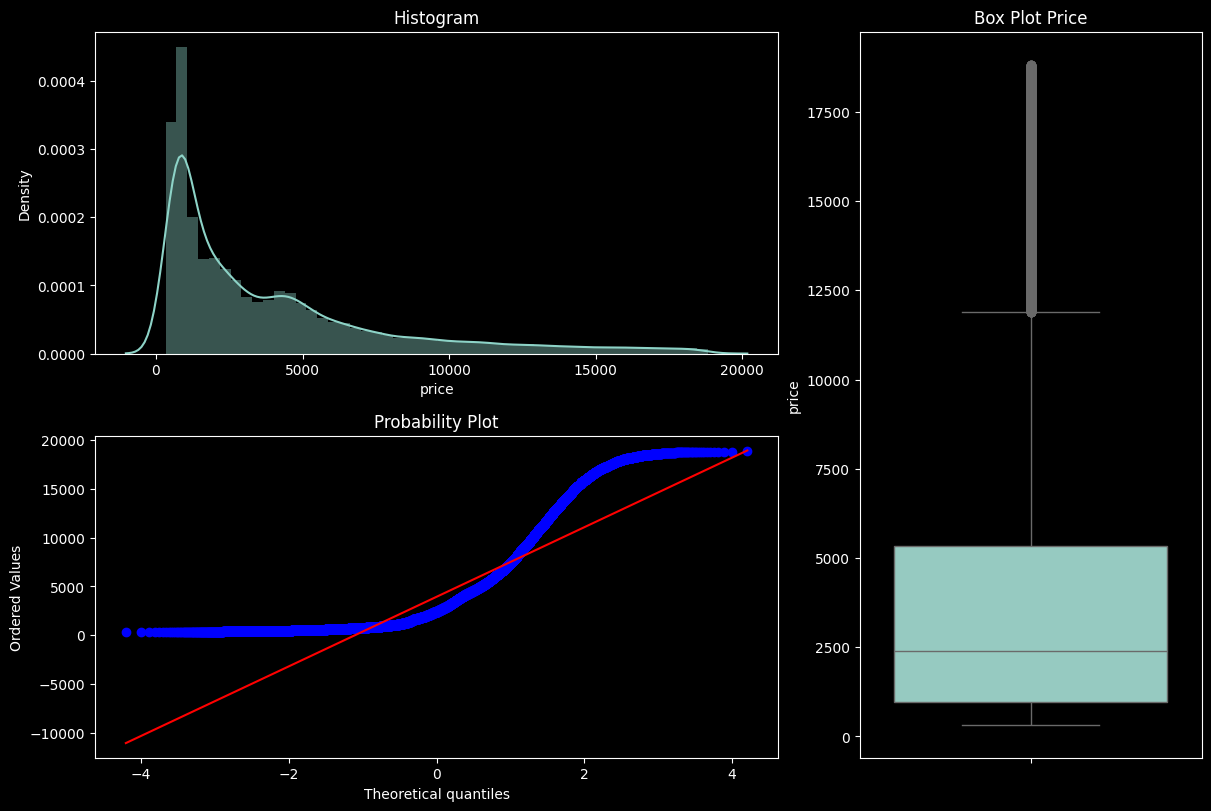

In [19]:
chart_price_normal(y)

Using a statistical test

Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [20]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(y) ###does not appear to be normal

NormaltestResult(statistic=np.float64(15055.369704438519), pvalue=np.float64(0.0))

In [21]:
#removing  some outliers
iqr = y.quantile(0.75) - y.quantile(0.25)
lim = np.abs((y - y.median()) / iqr) < 2.22
df_ohe_nout = df_ohe.loc[lim.values,:].copy()
y_nout = df_ohe_nout['price'].copy()

#lim = np.abs(y - y.mean())/y.std() <3

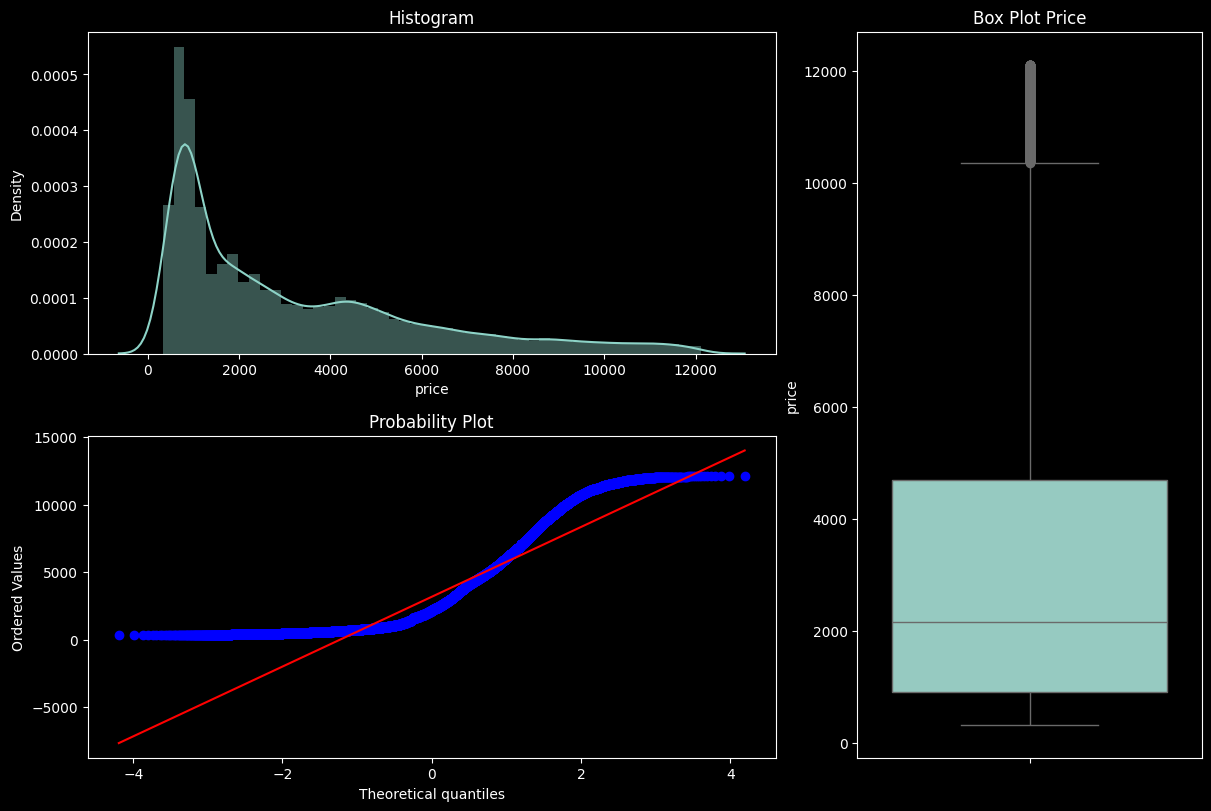

NormaltestResult(statistic=np.float64(8360.339685612327), pvalue=np.float64(0.0))


(50422,)

In [22]:
#data wihtout some outliers
chart_price_normal(y_nout)
print(normaltest(y_nout))
y_nout.shape

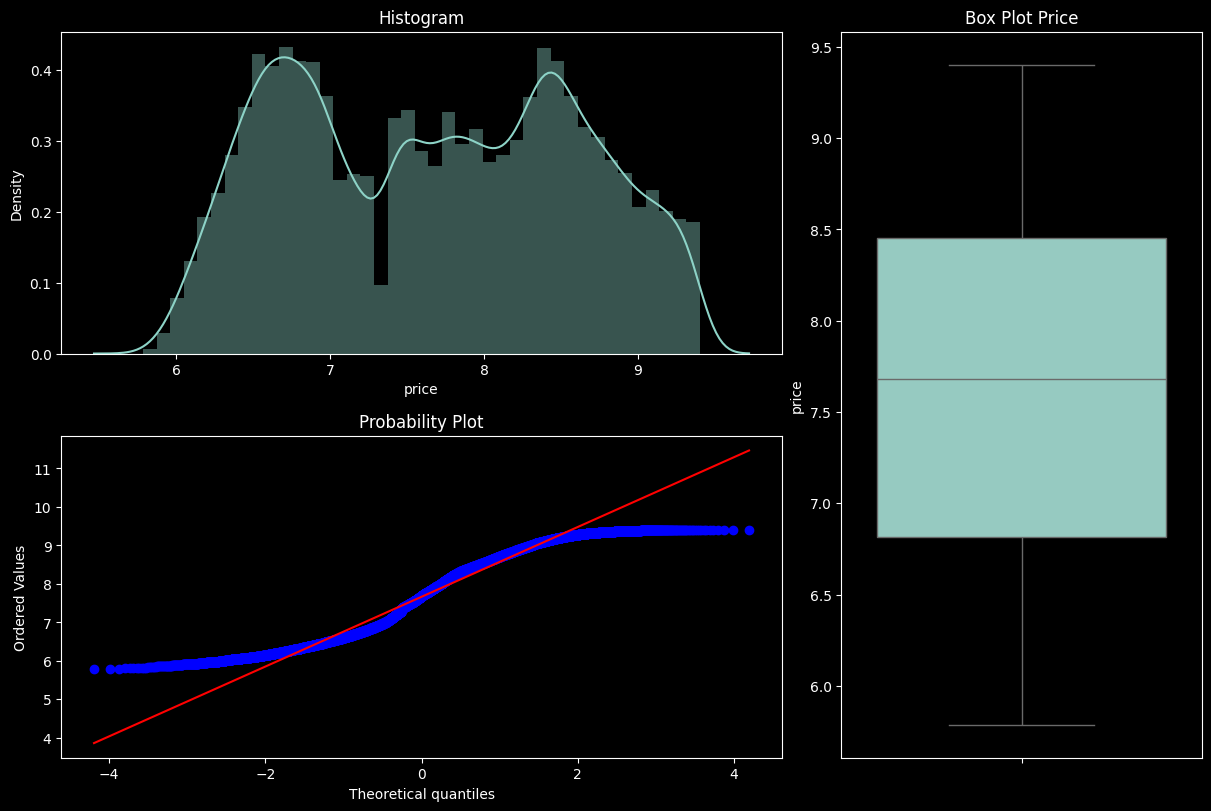

NormaltestResult(statistic=np.float64(46977.83991746495), pvalue=np.float64(0.0))

In [23]:
## testing with log (
y_log = np.log(y_nout)
chart_price_normal(y_log)
normaltest(y_log)

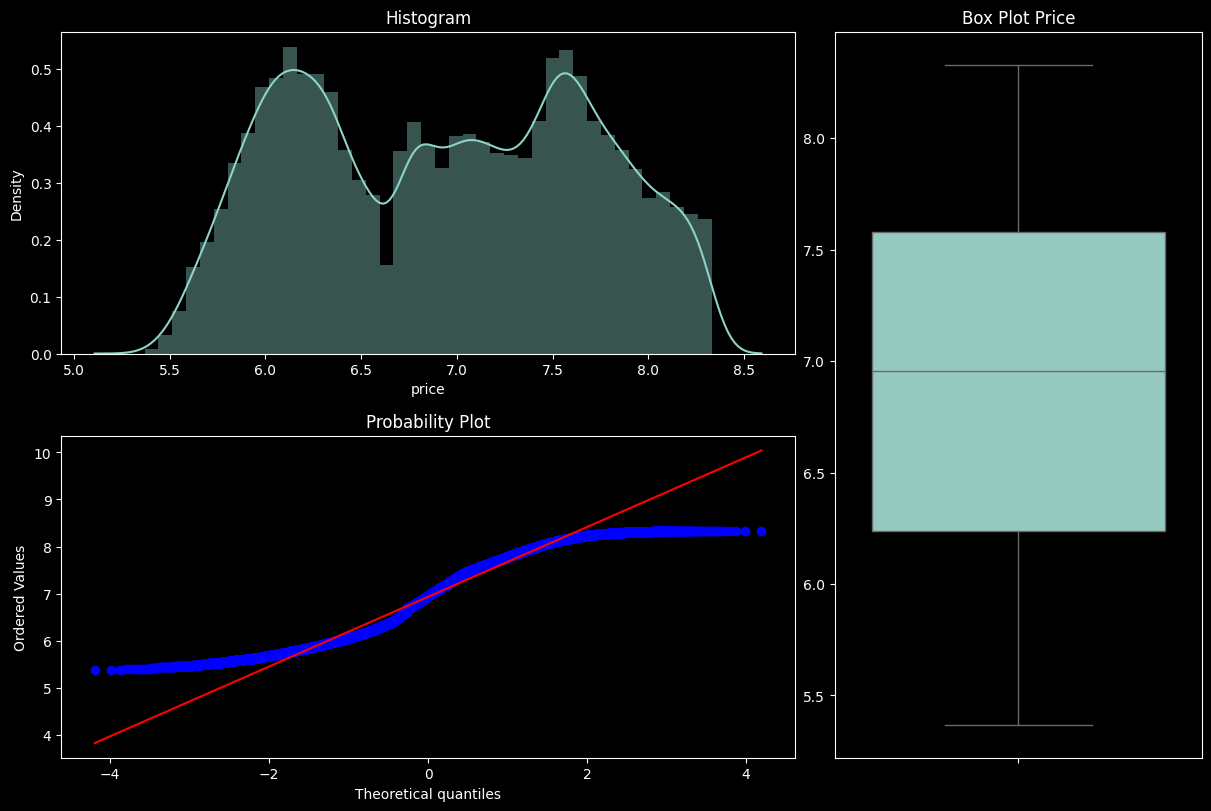

NormaltestResult(statistic=np.float64(49112.445132141984), pvalue=np.float64(0.0))
lambda=  -0.026289850898286823


In [24]:
##box cox(y_i) = (y_i^\lambda -1)/\lambda
from scipy.stats import boxcox

y_bc, lamb_bc= boxcox(y_nout)
chart_price_normal(y_bc)
print(normaltest(y_bc))
print('lambda= ', lamb_bc)

**Target variable y='price' does not seem to distribute normally after applying some standar transformations to normalize the data**

## 4. Regression Models, Regularization, Cross Validation <a class='anchor' id='regression'></a>


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

#### Train test split

In [26]:
## Due to memory issues running the code in my laptop, I will take a random sample of the data to perform the regressions
##If you have no problem with the memory, don't run this line
X_tot = df_ohe.drop('price', axis=1).copy()
y_tot = df_ohe['price'].astype(float).copy()

X_tot_nout = df_ohe_nout.drop('price', axis=1).copy()
y_tot_nout = df_ohe_nout['price'].astype(float).copy()

df_sample = df_ohe_nout.sample(frac=0.05, random_state=666)
#df_sample = df_ohe.sample(frac=0.05, random_state=666)

X_sample = df_sample.drop('price', axis=1).copy()
y_sample = df_sample['price'].astype(float).copy()

X_tot.shape, y_tot.shape, X_tot_nout.shape, y_tot_nout.shape, X_sample.shape, y_sample.shape

##later we could see how the results interpolate to the whole daata
model = []
r2_test =[]
r2_total = []
mse_test = []
mse_total = []

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=999)
print('Number of test samples = ', X_test.shape[0])
print('Number of train samples = ', X_train.shape[0])

Number of test samples =  505
Number of train samples =  2016


In [28]:
#defining some functions
def yreal_vs_ypred(y_predicted_total, y_predicted_test):
    fig, (ax1, ax2) = plt.subplots(figsize =(15,5), ncols=2, sharey=False)
    ax1.scatter(y_tot, y_predicted_total)
    ax1.plot(y_tot,y_tot, color='red')
    ax1.set_xlabel('y_real_all_data')
    ax1.set_ylabel('y_pred')

    ax2.scatter(y_test, y_predicted_test)
    ax2.plot(y_test,y_test, color='red')
    ax2.set_xlabel('y_real_test_data')
    ax2.set_ylabel('y_pred')
    plt.show()
    plt.close()

def  plot_dis(ytot,ytot_hat, ytest, ytest_hat):
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn
    
    fig, (ax1, ax2) = plt.subplots(figsize =(15,5), ncols=2, sharey=False)
    
    sns.distplot(ytot, hist=False, color='r', label='Actual Values', ax=ax1)
    sns.distplot(ytot_hat, hist=False, color='b', label='Fitted Values', ax=ax1)
    ax1.legend()
    ax1.set_title('Using all the data')
    ax1.set_xlabel('Price (in dollars)')
    ax1.set_ylabel('Proportion of Diamonds')

    sns.distplot(ytest, hist=False, color='r', label='Actual Values', ax=ax2)
    sns.distplot(ytest_hat, hist=False, color='b', label='Fitted Values', ax=ax2)
    ax2.legend()
    ax2.set_title('Using test data')
    ax2.set_xlabel('Price (in dollars)')
    ax2.set_ylabel('Proportion of Diamonds')
    
    plt.show()
    plt.close()

def plot_coef(pipe,name=None):
    temp = pd.DataFrame( data = {'features': pipe.named_steps['polynomial'].get_feature_names_out(), 'coefficients': np.abs(pipe.named_steps['model'].coef_)})
    temp = temp.sort_values(by='coefficients', ascending=False).head(30)
    sns.barplot(y= temp.features, x= temp.coefficients, orient='h')
    #plt.xticks(rotation=90)
    plt.xlabel("Absolute value of the 30 largest coefficients")
    plt.title(name)
    plt.show()

### Polynomial Regression

##### Using Standard Scaler

Best model:  {'polynomial__degree': 1}
Best_mean_test_score:  0.9160684856262812


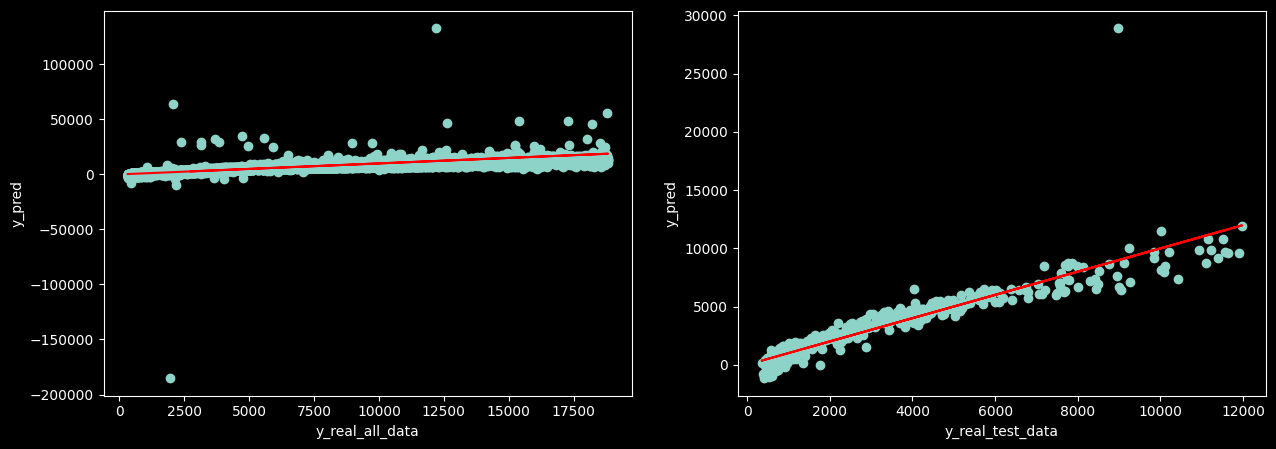

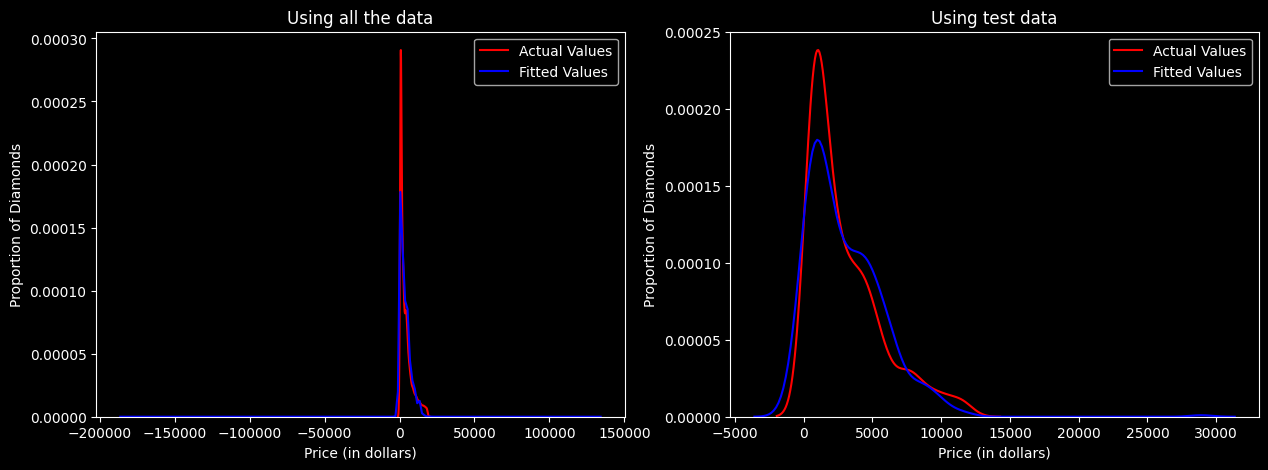

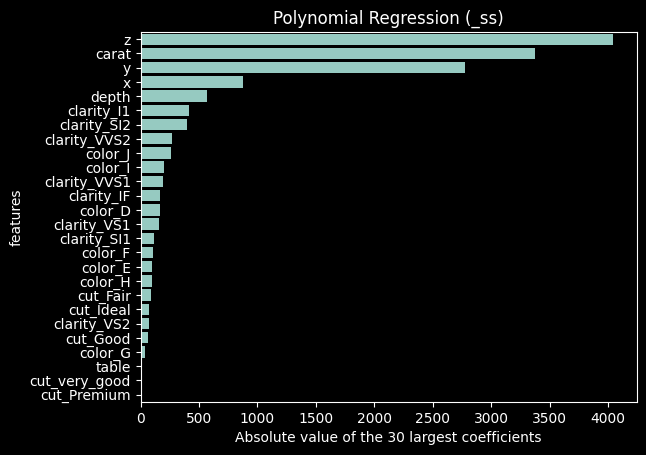

r2_score, training data =  0.9202660917190026
r2_score, test data =  0.8234360430922624
r2_score, all data =  0.8275925830890347
mean squared error, test data =  1259220.050861008
mean squared error, all data=  2742098.8092447706


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004028      0.000531         0.001537        0.000381   
1       0.048151      0.005518         0.003377        0.000603   
3      11.043400      1.522575         0.097333        0.015544   
2       1.823459      0.297644         0.014050        0.002182   

   param_polynomial__degree                     params  split0_test_score  \
0                         1  {'polynomial__degree': 1}           0.917564   
1                         2  {'polynomial__degree': 2}           0.964508   
3                         4  {'polynomial__degree': 4}       -2670.907411   
2                         3  {'polynomial__degree': 3}     -120080.720063   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.919501           0.919475           0.919880           0.903921   
1           0.972506           0.962559           0.340198           0.937857   
3       -1492.417429        -933.270894      -27448.763275       -3098.847332   
2      -31664.028116      -47394.182672      -96418.390322     -347691.239147   

   mean_test_score  std_test_score  rank_test_score  
0         0.916068        0.006127                1  
1         0.835526        0.247935                2  
3     -7128.841268    10189.873618                3  
2   -128649.712064   114105.355054                4

In [29]:
Input_reg_ss = [ ('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), ('ss', StandardScaler()), ('model', LinearRegression()) ]
pipe_reg_ss = Pipeline( Input_reg_ss)

param_grid_reg = {"polynomial__degree": [1,2,3,4]}
gsearch_reg_ss = GridSearchCV(pipe_reg_ss, param_grid_reg, n_jobs=3, cv=5)

gsearch_reg_ss.fit(X_train, y_train)

print('Best model: ', gsearch_reg_ss.best_params_)
print('Best_mean_test_score: ', gsearch_reg_ss.best_score_)

#using the best model
best_reg_ss = gsearch_reg_ss.best_estimator_
##print(best_reg)
best_reg_ss.fit(X_train, y_train)
y_pred_reg_ss = best_reg_ss.predict(X_test)
y_pred_tot_reg_ss = best_reg_ss.predict(X_tot)

r2_train_reg_ss = r2_score(y_train, best_reg_ss.predict(X_train))
r2_test_reg_ss = r2_score(y_test, y_pred_reg_ss)
r2_tot_reg_ss = r2_score(y_tot, y_pred_tot_reg_ss)
mse_test_reg_ss = mean_squared_error(y_test, y_pred_reg_ss)
mse_tot_reg_ss = mean_squared_error(y_tot, y_pred_tot_reg_ss)

model.append("Poly_Reg (_ss)")
r2_test.append(r2_test_reg_ss)
r2_total.append(r2_tot_reg_ss)
mse_test.append(mse_test_reg_ss)
mse_total.append(mse_tot_reg_ss)

yreal_vs_ypred(y_pred_tot_reg_ss, y_pred_reg_ss)
plot_dis(y_tot, y_pred_tot_reg_ss, y_test, y_pred_reg_ss)
plot_coef(best_reg_ss, name = 'Polynomial Regression (_ss)')
print('r2_score, training data = ', r2_train_reg_ss)
print('r2_score, test data = ', r2_test_reg_ss)
print('r2_score, all data = ', r2_tot_reg_ss)
print('mean squared error, test data = ', mse_test_reg_ss)
print('mean squared error, all data= ', mse_tot_reg_ss)
pd.DataFrame(gsearch_reg_ss.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

##### Using MinMaxScaler

Best model:  {'polynomial__degree': 1}
Best_mean_test_score:  0.9160684856262821


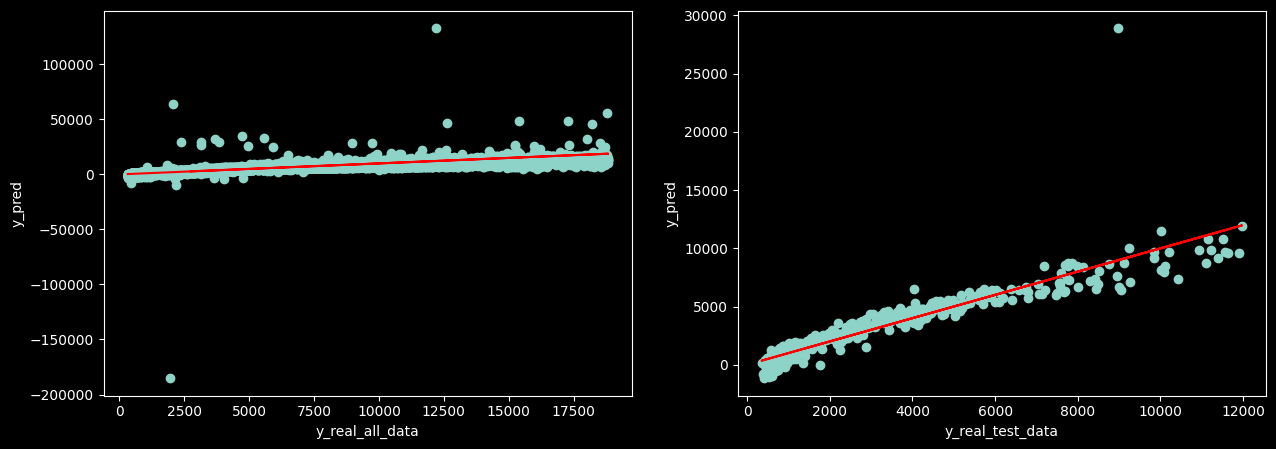

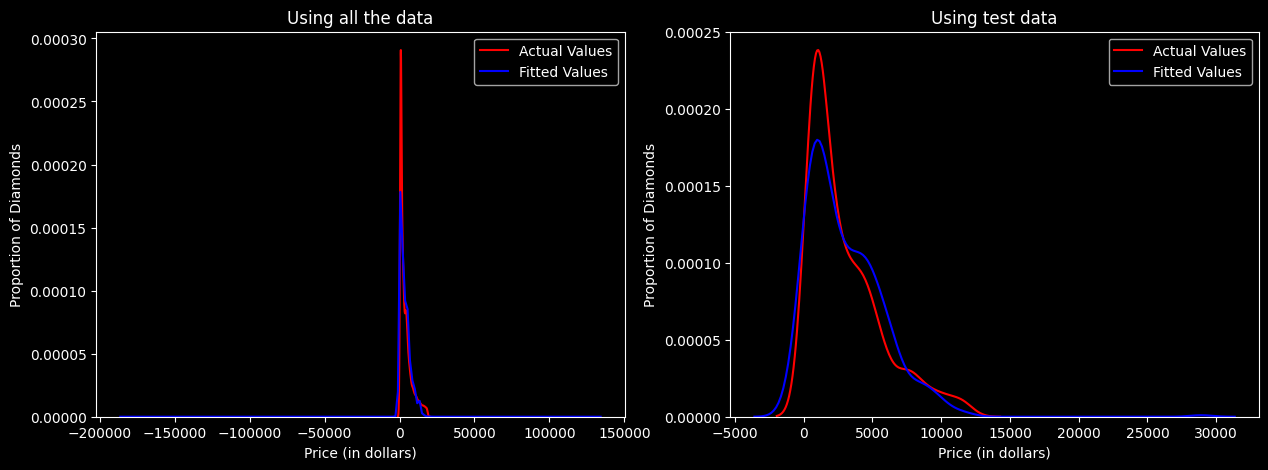

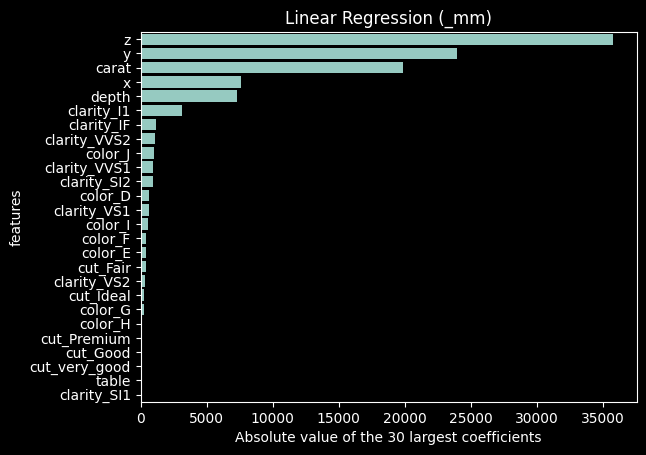

r2_score, training data =  0.9202660917190028
r2_score, test data =  0.8234360430922647
r2_score, all data =  0.8275925830890382
mean squared error, test data =  1259220.050860992
mean squared error, all data=  2742098.809244716


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005301      0.000364         0.001987        0.000156   
1       0.064588      0.008610         0.004444        0.000197   
3      12.482458      2.867330         0.099622        0.013464   
2       2.449191      0.347759         0.018127        0.004542   

   param_polynomial__degree                     params  split0_test_score  \
0                         1  {'polynomial__degree': 1}           0.917564   
1                         2  {'polynomial__degree': 2}           0.964508   
3                         4  {'polynomial__degree': 4}        -381.193472   
2                         3  {'polynomial__degree': 3}     -602053.836483   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.919501           0.919475           0.919880           0.903921   
1           0.972506           0.962052           0.340057           0.955208   
3        -213.835166        -133.439537      -16170.859414       -2554.859937   
2     -106631.875402      -18775.941449      -13661.495530     -131235.054844   

   mean_test_score  std_test_score  rank_test_score  
0         0.916068        0.006127                1  
1         0.838866        0.249466                2  
3     -3890.837505     6205.477598                3  
2   -174471.640742   218814.635625                4

In [30]:
Input_reg_mm = [ ('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), ('mm', MinMaxScaler()), ('model', LinearRegression()) ]
pipe_reg_mm = Pipeline( Input_reg_mm)

param_grid_reg = {"polynomial__degree": [1,2,3,4]}
gsearch_reg_mm = GridSearchCV(pipe_reg_mm, param_grid_reg, n_jobs=3, cv=5)

gsearch_reg_mm.fit(X_train, y_train)

print('Best model: ', gsearch_reg_mm.best_params_)
print('Best_mean_test_score: ', gsearch_reg_mm.best_score_)

#using the best model
best_reg_mm = gsearch_reg_mm.best_estimator_
##print(best_reg)
best_reg_mm.fit(X_train, y_train)
y_pred_reg_mm = best_reg_mm.predict(X_test)
y_pred_tot_reg_mm = best_reg_mm.predict(X_tot)

r2_train_reg_mm = r2_score(y_train, best_reg_mm.predict(X_train))
r2_test_reg_mm = r2_score(y_test, y_pred_reg_mm)
r2_tot_reg_mm = r2_score(y_tot, y_pred_tot_reg_mm)
mse_test_reg_mm = mean_squared_error(y_test, y_pred_reg_mm)
mse_tot_reg_mm = mean_squared_error(y_tot, y_pred_tot_reg_mm)

model.append("Poly_Reg (_mm)")
r2_test.append(r2_test_reg_mm)
r2_total.append(r2_tot_reg_mm)
mse_test.append(mse_test_reg_mm)
mse_total.append(mse_tot_reg_mm)

yreal_vs_ypred(y_pred_tot_reg_mm, y_pred_reg_mm)
plot_dis(y_tot, y_pred_tot_reg_mm, y_test, y_pred_reg_mm)
plot_coef(best_reg_mm, name = 'Linear Regression (_mm)')
print('r2_score, training data = ', r2_train_reg_mm)
print('r2_score, test data = ', r2_test_reg_mm)
print('r2_score, all data = ', r2_tot_reg_mm)
print('mean squared error, test data = ', mse_test_reg_mm)
print('mean squared error, all data= ', mse_tot_reg_mm)
pd.DataFrame(gsearch_reg_mm.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

### Ridge Regression

##### Using StandarScaler

Best model:  {'model__alpha': 10, 'polynomial__degree': 2}
Best_mean_test_score:  0.9608762437731457


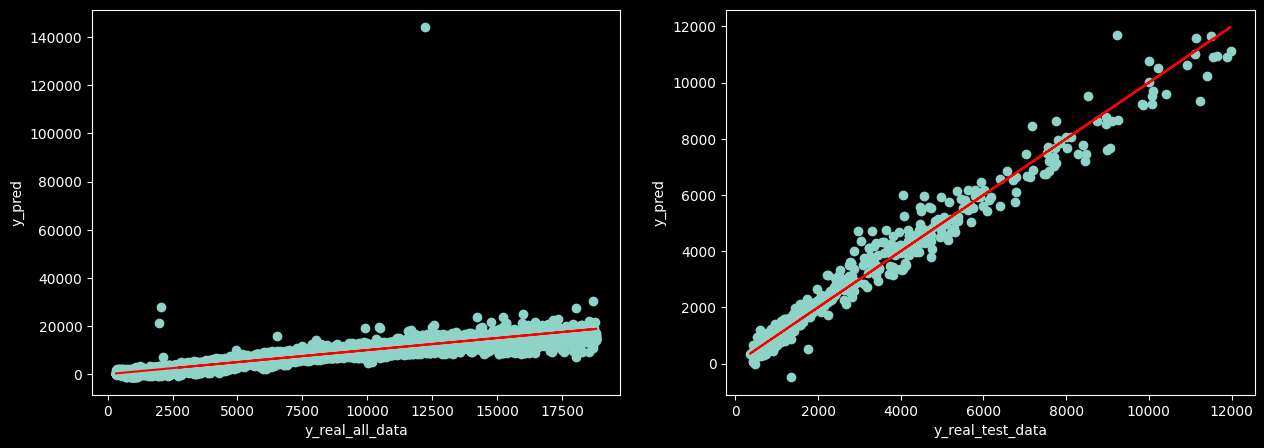

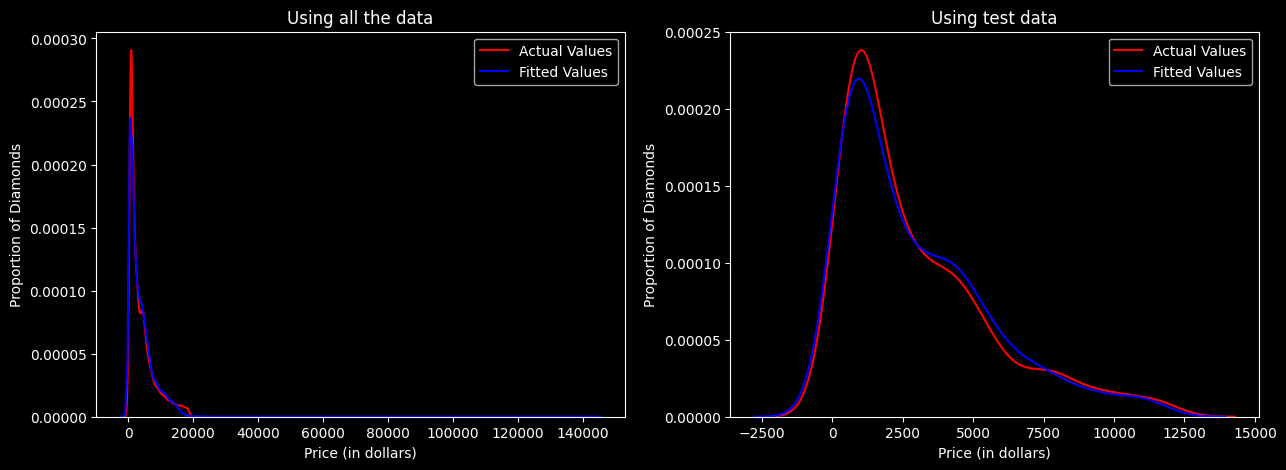

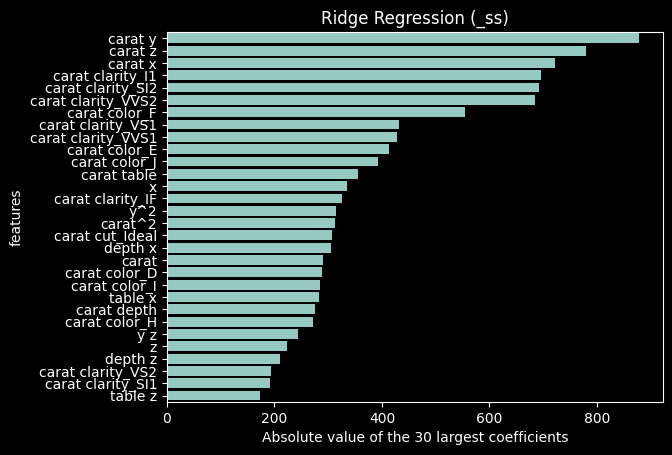

r2_score, training data =  0.9739303406649333
r2_score, test data =  0.9712739962345477
r2_score, all data =  0.9370742309847275
mean squared error, test data =  204868.3126277465
mean squared error, all data=  1000819.3346849906


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17       0.039281      0.002089         0.005695        0.000374   
22       0.648523      0.032762         0.020738        0.002563   
5        0.033591      0.000939         0.005076        0.000113   
9        0.034873      0.003356         0.005624        0.000258   

    param_model__alpha  param_polynomial__degree  \
17               10.00                         2   
22              100.00                         3   
5                 0.01                         2   
9                 0.10                         2   

                                             params  split0_test_score  \
17    {'model__alpha': 10, 'polynomial__degree': 2}           0.963573   
22   {'model__alpha': 100, 'polynomial__degree': 3}           0.949846   
5   {'model__alpha': 0.01, 'polynomial__degree': 2}           0.967713   
9    {'model__alpha': 0.1, 'polynomial__degree': 2}           0.968272   

    split1_test_score  split2_test_score  split3_test_score  \
17           0.975470           0.962412           0.947383   
22           0.977657           0.959462           0.961295   
5            0.974495           0.962379           0.931050   
9            0.976153           0.964491           0.923770   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
17           0.955544         0.960876        0.009307                1  
22           0.953539         0.960360        0.009570                2  
5            0.959124         0.958952        0.014891                3  
9            0.958050         0.958147        0.018159                4

In [31]:
Input_ridgereg_ss = [ ('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), ('ss', StandardScaler()), ('model', Ridge(alpha=1)) ]
pipe_ridgereg_ss = Pipeline( Input_ridgereg_ss)

param_grid_ridgereg = {"polynomial__degree": [1,2,3,4], "model__alpha":[0.001,0.01,0.1,1,10,100]}
gsearch_ridgereg_ss = GridSearchCV(pipe_ridgereg_ss, param_grid_ridgereg, n_jobs=4, cv=5)

gsearch_ridgereg_ss.fit(X_train, y_train)

print('Best model: ', gsearch_ridgereg_ss.best_params_)
print('Best_mean_test_score: ', gsearch_ridgereg_ss.best_score_)

#using the best model
best_ridgereg_ss = gsearch_ridgereg_ss.best_estimator_
##print(best_ridgereg)
best_ridgereg_ss.fit(X_train, y_train)
y_pred_ridgereg_ss = best_ridgereg_ss.predict(X_test)
y_pred_tot_ridgereg_ss = best_ridgereg_ss.predict(X_tot)

r2_train_ridgereg_ss = r2_score(y_train, best_ridgereg_ss.predict(X_train))
r2_test_ridgereg_ss = r2_score(y_test, y_pred_ridgereg_ss)
r2_tot_ridgereg_ss = r2_score(y_tot, y_pred_tot_ridgereg_ss)
mse_test_ridgereg_ss = mean_squared_error(y_test, y_pred_ridgereg_ss)
mse_tot_ridgereg_ss = mean_squared_error(y_tot, y_pred_tot_ridgereg_ss)

model.append("Ridge_Regression (_ss)")
r2_test.append(r2_test_ridgereg_ss)
r2_total.append(r2_tot_ridgereg_ss)
mse_test.append(mse_test_ridgereg_ss)
mse_total.append(mse_tot_ridgereg_ss)

yreal_vs_ypred(y_pred_tot_ridgereg_ss, y_pred_ridgereg_ss)
plot_dis(y_tot, y_pred_tot_ridgereg_ss, y_test, y_pred_ridgereg_ss)
plot_coef(best_ridgereg_ss, name = 'Ridge Regression (_ss)')
print('r2_score, training data = ', r2_train_ridgereg_ss)
print('r2_score, test data = ', r2_test_ridgereg_ss)
print('r2_score, all data = ', r2_tot_ridgereg_ss)
print('mean squared error, test data = ', mse_test_ridgereg_ss)
print('mean squared error, all data= ', mse_tot_ridgereg_ss)
pd.DataFrame(gsearch_ridgereg_ss.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

##### Using MinMaxScaler

Best model:  {'model__alpha': 1, 'polynomial__degree': 3}
Best_mean_test_score:  0.9640457737806829


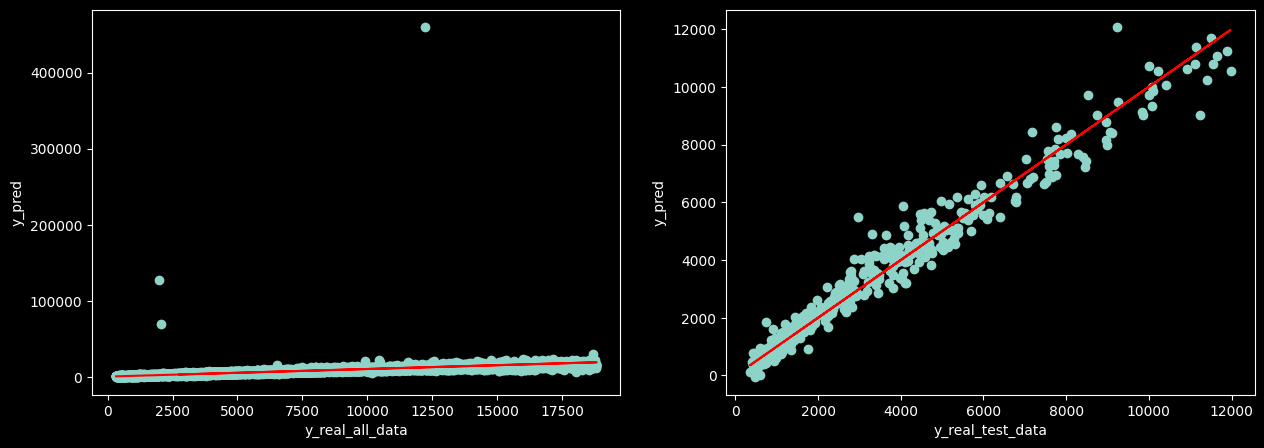

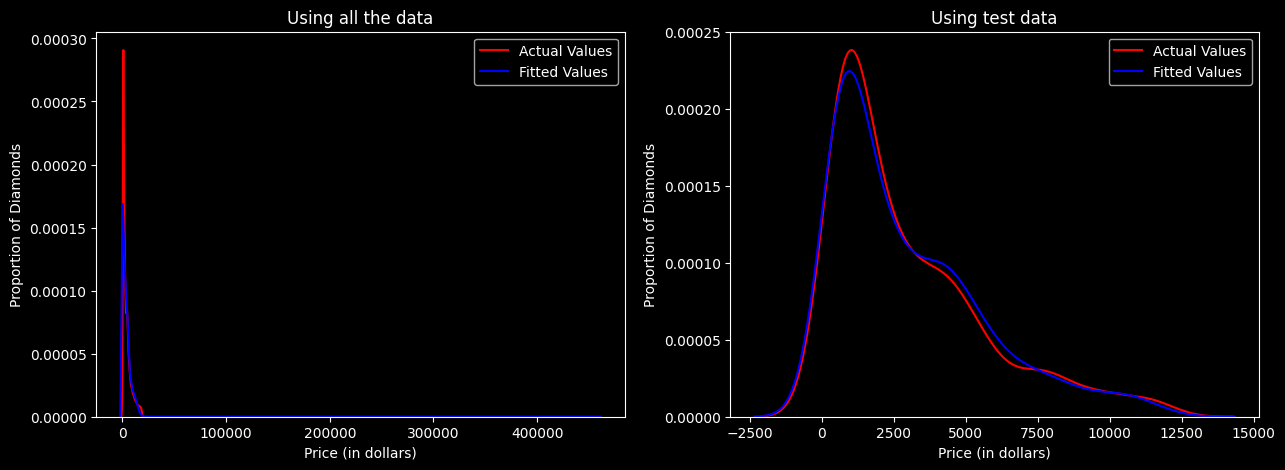

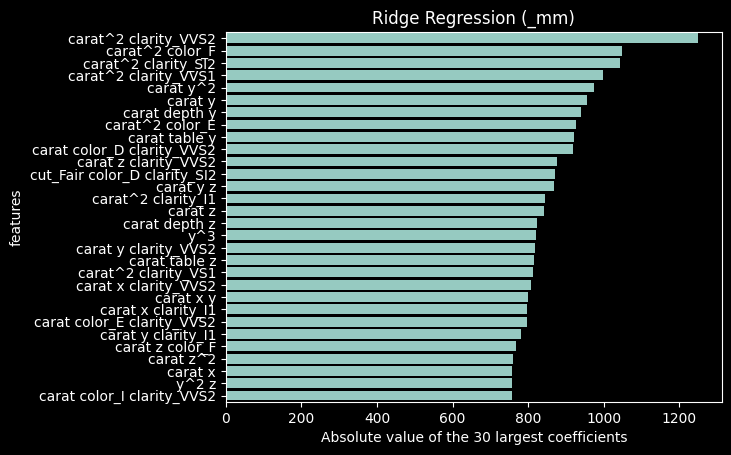

r2_score, training data =  0.9813872019688857
r2_score, test data =  0.9716095461689318
r2_score, all data =  0.7033082456757599
mean squared error, test data =  202475.2352814884
mean squared error, all data=  4718811.526915799


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       0.572266      0.032896         0.019522        0.002026   
1        0.023641      0.003407         0.005935        0.003241   
19       3.152936      0.081228         0.120004        0.007150   
15       2.955364      0.085978         0.124226        0.023519   

    param_model__alpha  param_polynomial__degree  \
14               1.000                         3   
1                0.001                         2   
19              10.000                         4   
15               1.000                         4   

                                              params  split0_test_score  \
14      {'model__alpha': 1, 'polynomial__degree': 3}           0.962045   
1   {'model__alpha': 0.001, 'polynomial__degree': 2}           0.968108   
19     {'model__alpha': 10, 'polynomial__degree': 4}           0.959939   
15      {'model__alpha': 1, 'polynomial__degree': 4}           0.942427   

    split1_test_score  split2_test_score  split3_test_score  \
14           0.977667           0.961104           0.960340   
1            0.975973           0.964493           0.944011   
19           0.976162           0.957721           0.962487   
15           0.977873           0.957363           0.961302   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
14           0.959073         0.964046        0.006880                1  
1            0.959516         0.962420        0.010655                2  
19           0.955506         0.962363        0.007278                3  
15           0.953978         0.958589        0.011517                4

In [32]:
Input_ridgereg_mm = [ ('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), ('mm', MinMaxScaler()), ('model', Ridge(alpha=1)) ]
pipe_ridgereg_mm = Pipeline( Input_ridgereg_mm)

param_grid_ridgereg = {"polynomial__degree": [1,2,3,4], "model__alpha":[0.001,0.01,0.1,1,10,100]}
gsearch_ridgereg_mm = GridSearchCV(pipe_ridgereg_mm, param_grid_ridgereg, n_jobs=4, cv=5)

gsearch_ridgereg_mm.fit(X_train, y_train)

print('Best model: ', gsearch_ridgereg_mm.best_params_)
print('Best_mean_test_score: ', gsearch_ridgereg_mm.best_score_)

#using the best model
best_ridgereg_mm = gsearch_ridgereg_mm.best_estimator_
##print(best_ridgereg)
best_ridgereg_mm.fit(X_train, y_train)
y_pred_ridgereg_mm = best_ridgereg_mm.predict(X_test)
y_pred_tot_ridgereg_mm = best_ridgereg_mm.predict(X_tot)

r2_train_ridgereg_mm = r2_score(y_train, best_ridgereg_mm.predict(X_train))
r2_test_ridgereg_mm = r2_score(y_test, y_pred_ridgereg_mm)
r2_tot_ridgereg_mm = r2_score(y_tot, y_pred_tot_ridgereg_mm)
mse_test_ridgereg_mm = mean_squared_error(y_test, y_pred_ridgereg_mm)
mse_tot_ridgereg_mm = mean_squared_error(y_tot, y_pred_tot_ridgereg_mm)

model.append("Ridge_Regression (_mm)")
r2_test.append(r2_test_ridgereg_mm)
r2_total.append(r2_tot_ridgereg_mm)
mse_test.append(mse_test_ridgereg_mm)
mse_total.append(mse_tot_ridgereg_mm)

yreal_vs_ypred(y_pred_tot_ridgereg_mm, y_pred_ridgereg_mm)
plot_dis(y_tot, y_pred_tot_ridgereg_mm, y_test, y_pred_ridgereg_mm)
plot_coef(best_ridgereg_mm, name = 'Ridge Regression (_mm)')
print('r2_score, training data = ', r2_train_ridgereg_mm)
print('r2_score, test data = ', r2_test_ridgereg_mm)
print('r2_score, all data = ', r2_tot_ridgereg_mm)
print('mean squared error, test data = ', mse_test_ridgereg_mm)
print('mean squared error, all data= ', mse_tot_ridgereg_mm)
pd.DataFrame(gsearch_ridgereg_mm.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

### Lasso Regression

##### Using Standard Scaler

/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.180e+08, tolerance: 1.298e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.949e+08, tolerance: 1.235e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning

Best model:  {'model__alpha': 10, 'polynomial__degree': 3}
Best_mean_test_score:  0.965006727995324


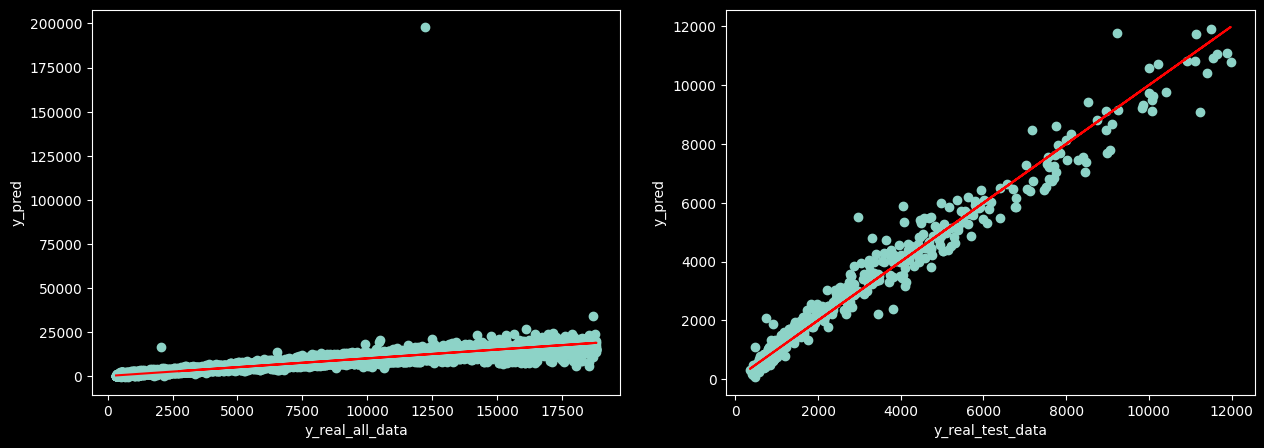

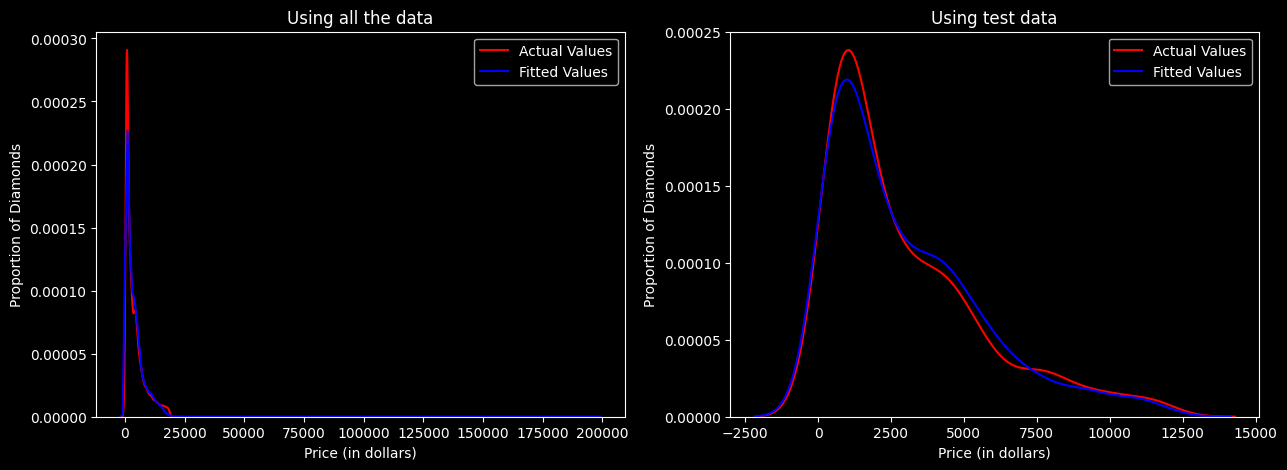

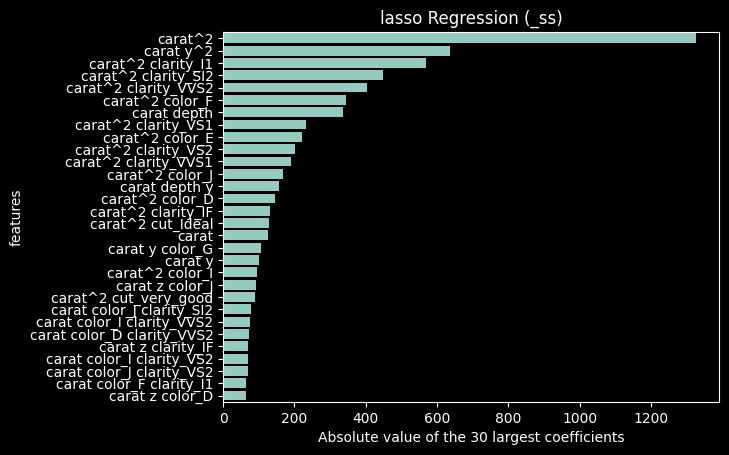

r2_score, training data =  0.9768948242607661
r2_score, test data =  0.970869304608607
r2_score, all data =  0.9192185461570743
mean squared error, test data =  207754.49516876388
mean squared error, all data=  1284809.7393985125


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18       2.518416      0.039292         0.019151        0.001307   
19      12.598051      0.151821         0.116696        0.007365   
17       0.293326      0.018488         0.006468        0.000371   
14       2.700412      0.084888         0.018812        0.000582   

    param_model__alpha  param_polynomial__degree  \
18                10.0                         3   
19                10.0                         4   
17                10.0                         2   
14                 1.0                         3   

                                           params  split0_test_score  \
18  {'model__alpha': 10, 'polynomial__degree': 3}           0.964612   
19  {'model__alpha': 10, 'polynomial__degree': 4}           0.964740   
17  {'model__alpha': 10, 'polynomial__degree': 2}           0.957888   
14   {'model__alpha': 1, 'polynomial__degree': 3}           0.926326   

    split1_test_score  split2_test_score  split3_test_score  \
18           0.976653           0.959999           0.959322   
19           0.980133           0.958789           0.961450   
17           0.965129           0.957103           0.951959   
14           0.979467           0.961494           0.947708   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
18           0.964448         0.965007        0.006221                1  
19           0.959539         0.964930        0.007875                2  
17           0.943832         0.955182        0.007059                3  
14           0.951338         0.953267        0.017405                4

In [33]:
Input_lassoreg_ss = [ ('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), ('ss', StandardScaler()), ('model', Lasso(alpha=1, max_iter=1000)) ]
pipe_lassoreg_ss = Pipeline( Input_lassoreg_ss)

param_grid_lassoreg = {"polynomial__degree": [1,2,3,4], "model__alpha":[0.001,0.01,0.1,1,10,100]}
gsearch_lassoreg_ss = GridSearchCV(pipe_lassoreg_ss, param_grid_lassoreg, n_jobs=4, cv=5)

gsearch_lassoreg_ss.fit(X_train, y_train)

print('Best model: ', gsearch_lassoreg_ss.best_params_)
print('Best_mean_test_score: ', gsearch_lassoreg_ss.best_score_)

#using the best model
best_lassoreg_ss = gsearch_lassoreg_ss.best_estimator_
##print(best_lassoreg)
best_lassoreg_ss.fit(X_train, y_train)
y_pred_lassoreg_ss = best_lassoreg_ss.predict(X_test)
y_pred_tot_lassoreg_ss = best_lassoreg_ss.predict(X_tot)

r2_train_lassoreg_ss = r2_score(y_train, best_lassoreg_ss.predict(X_train))
r2_test_lassoreg_ss = r2_score(y_test, y_pred_lassoreg_ss)
r2_tot_lassoreg_ss = r2_score(y_tot, y_pred_tot_lassoreg_ss)
mse_test_lassoreg_ss = mean_squared_error(y_test, y_pred_lassoreg_ss)
mse_tot_lassoreg_ss = mean_squared_error(y_tot, y_pred_tot_lassoreg_ss)

model.append("lasso_Regression (_ss)")
r2_test.append(r2_test_lassoreg_ss)
r2_total.append(r2_tot_lassoreg_ss)
mse_test.append(mse_test_lassoreg_ss)
mse_total.append(mse_tot_lassoreg_ss)

yreal_vs_ypred(y_pred_tot_lassoreg_ss, y_pred_lassoreg_ss)
plot_dis(y_tot, y_pred_tot_lassoreg_ss, y_test, y_pred_lassoreg_ss)
plot_coef(best_lassoreg_ss, name = 'lasso Regression (_ss)')
print('r2_score, training data = ', r2_train_lassoreg_ss)
print('r2_score, test data = ', r2_test_lassoreg_ss)
print('r2_score, all data = ', r2_tot_lassoreg_ss)
print('mean squared error, test data = ', mse_test_lassoreg_ss)
print('mean squared error, all data= ', mse_tot_lassoreg_ss)
pd.DataFrame(gsearch_lassoreg_ss.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

##### Usign MinMaxScaler

/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.133e+08, tolerance: 1.298e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.220e+08, tolerance: 1.317e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning

Best model:  {'model__alpha': 1, 'polynomial__degree': 3}
Best_mean_test_score:  0.9649044424260576


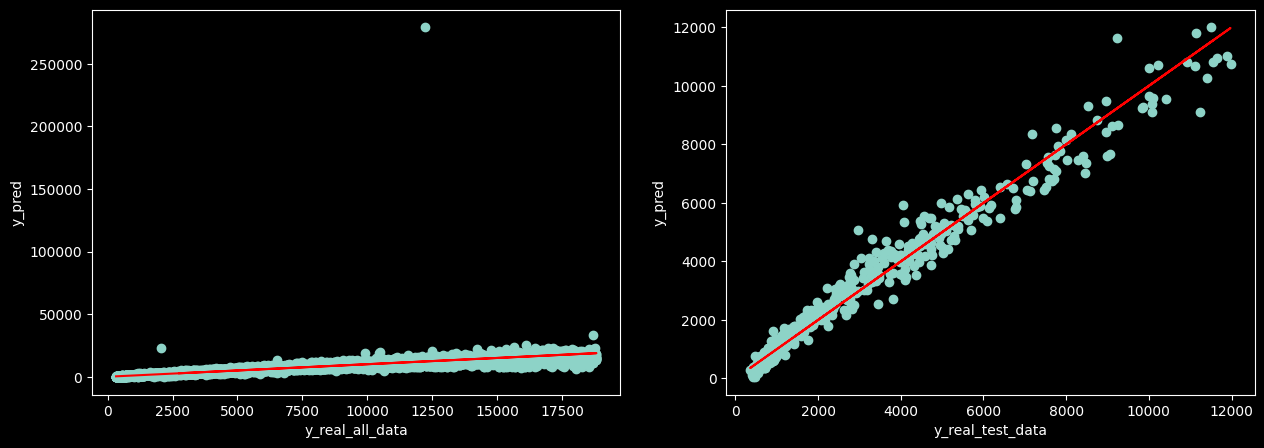

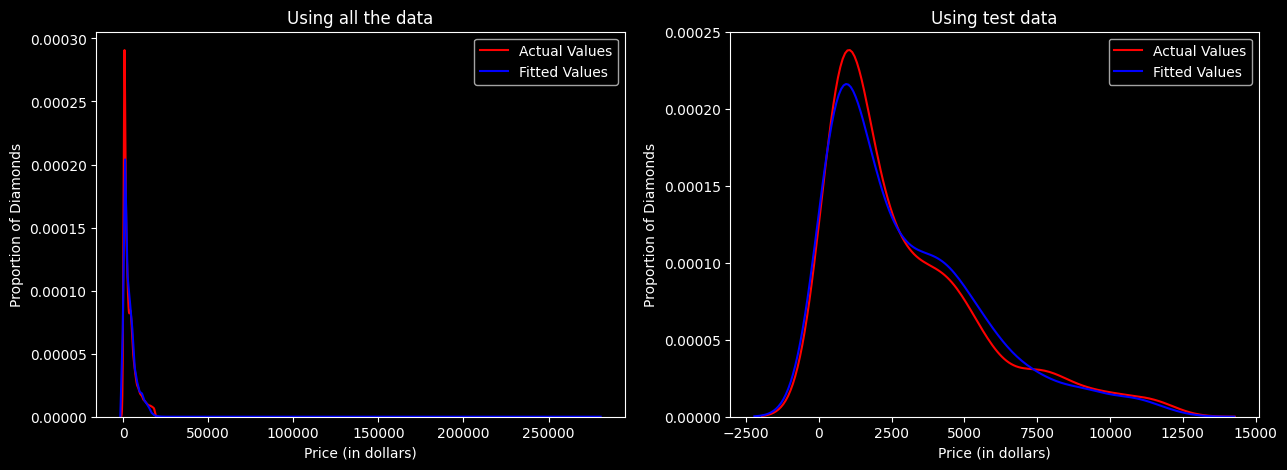

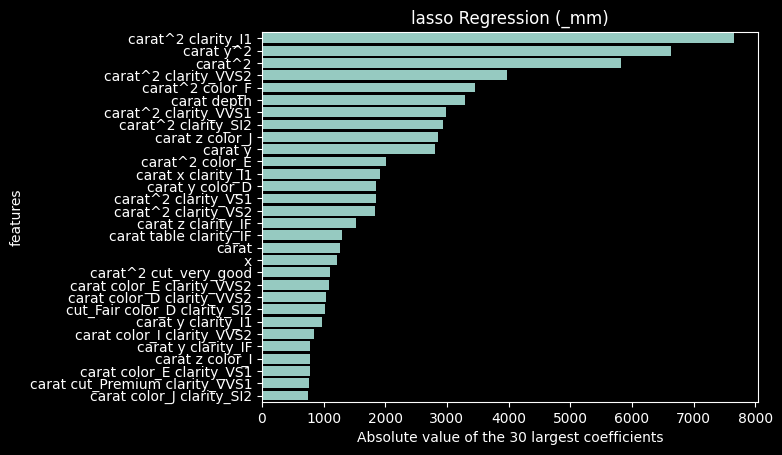

r2_score, training data =  0.974012493676746
r2_score, test data =  0.971360991211309
r2_score, all data =  0.8729680151233113
mean squared error, test data =  204247.88124990117
mean squared error, all data=  2020413.3946641898


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       2.493677      0.133545         0.021351        0.003290   
15      12.302816      0.111174         0.121535        0.006638   
13       0.302384      0.019476         0.006452        0.001104   
10       2.506622      0.097057         0.017768        0.001109   

    param_model__alpha  param_polynomial__degree  \
14                 1.0                         3   
15                 1.0                         4   
13                 1.0                         2   
10                 0.1                         3   

                                            params  split0_test_score  \
14    {'model__alpha': 1, 'polynomial__degree': 3}           0.963897   
15    {'model__alpha': 1, 'polynomial__degree': 4}           0.961675   
13    {'model__alpha': 1, 'polynomial__degree': 2}           0.961103   
10  {'model__alpha': 0.1, 'polynomial__degree': 3}           0.951466   

    split1_test_score  split2_test_score  split3_test_score  \
14           0.973245           0.959798           0.962164   
15           0.974681           0.960301           0.960750   
13           0.967239           0.959315           0.959891   
10           0.979355           0.961381           0.933565   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
14           0.965418         0.964904        0.004570                1  
15           0.965983         0.964678        0.005392                2  
13           0.954946         0.960499        0.003960                3  
10           0.958013         0.956756        0.014829                4

In [34]:
Input_lassoreg_mm = [ ('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), ('mm', MinMaxScaler()), ('model', Lasso(alpha=1, max_iter=1000)) ]
pipe_lassoreg_mm = Pipeline( Input_lassoreg_mm)

param_grid_lassoreg = {"polynomial__degree": [1,2,3,4], "model__alpha":[0.001,0.01,0.1,1,10,100]}
gsearch_lassoreg_mm = GridSearchCV(pipe_lassoreg_mm, param_grid_lassoreg, n_jobs=4, cv=5)

gsearch_lassoreg_mm.fit(X_train, y_train)

print('Best model: ', gsearch_lassoreg_mm.best_params_)
print('Best_mean_test_score: ', gsearch_lassoreg_mm.best_score_)

#using the best model
best_lassoreg_mm = gsearch_lassoreg_mm.best_estimator_
##print(best_lassoreg)
best_lassoreg_mm.fit(X_train, y_train)
y_pred_lassoreg_mm = best_lassoreg_mm.predict(X_test)
y_pred_tot_lassoreg_mm = best_lassoreg_mm.predict(X_tot)

r2_train_lassoreg_mm = r2_score(y_train, best_lassoreg_mm.predict(X_train))
r2_test_lassoreg_mm = r2_score(y_test, y_pred_lassoreg_mm)
r2_tot_lassoreg_mm = r2_score(y_tot, y_pred_tot_lassoreg_mm)
mse_test_lassoreg_mm = mean_squared_error(y_test, y_pred_lassoreg_mm)
mse_tot_lassoreg_mm = mean_squared_error(y_tot, y_pred_tot_lassoreg_mm)

model.append("lasso_Regression (_mm)")
r2_test.append(r2_test_lassoreg_mm)
r2_total.append(r2_tot_lassoreg_mm)
mse_test.append(mse_test_lassoreg_mm)
mse_total.append(mse_tot_lassoreg_mm)

yreal_vs_ypred(y_pred_tot_lassoreg_mm, y_pred_lassoreg_mm)
plot_dis(y_tot, y_pred_tot_lassoreg_mm, y_test, y_pred_lassoreg_mm)
plot_coef(best_lassoreg_mm, name = 'lasso Regression (_mm)')
print('r2_score, training data = ', r2_train_lassoreg_mm)
print('r2_score, test data = ', r2_test_lassoreg_mm)
print('r2_score, all data = ', r2_tot_lassoreg_mm)
print('mean squared error, test data = ', mse_test_lassoreg_mm)
print('mean squared error, all data= ', mse_tot_lassoreg_mm)
pd.DataFrame(gsearch_lassoreg_mm.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

### Elastic Net Regression

##### Using StandardScaler

/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+08, tolerance: 1.298e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.394e+08, tolerance: 1.317e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning

Best model:  {'model__alpha': 0.01, 'model__l1_ratio': 0.25, 'polynomial__degree': 2}
Best_mean_test_score:  0.9616558823029024


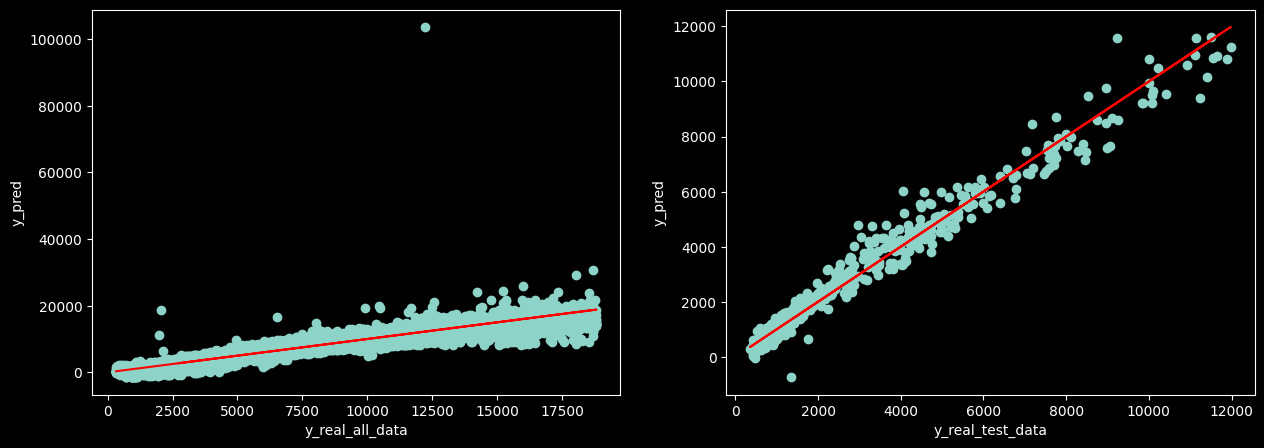

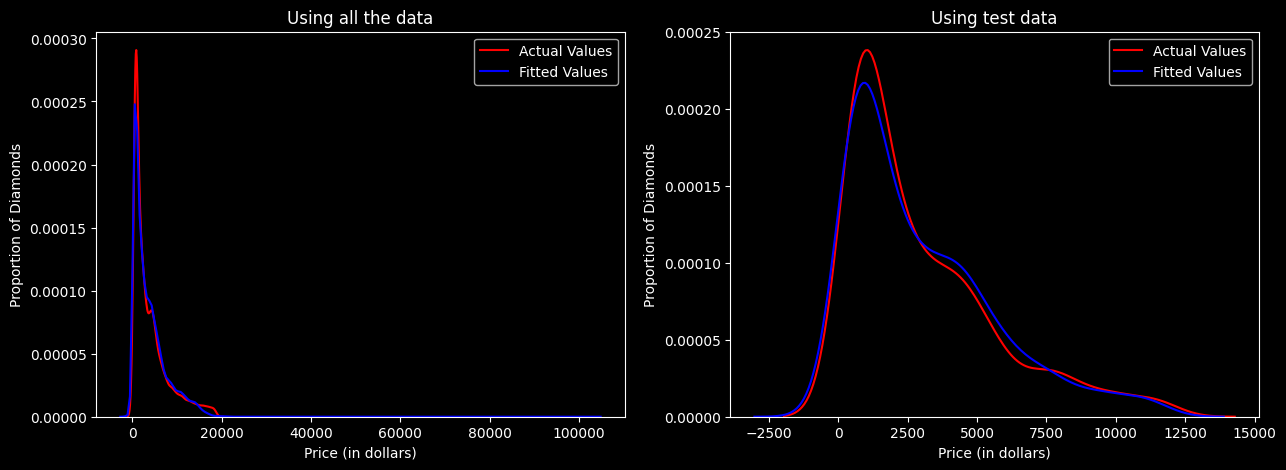

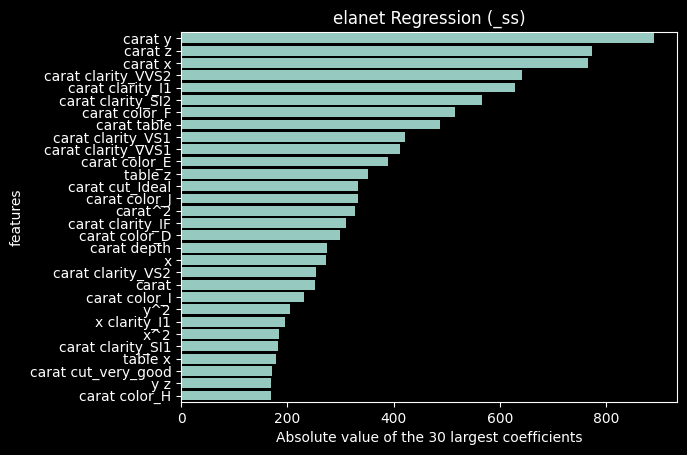

r2_score, training data =  0.9730483790216541
r2_score, test data =  0.9701661518247917
r2_score, all data =  0.9474550764340405
mean squared error, test data =  212769.24506282975
mean squared error, all data=  835714.4659065488


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
25       0.452022      0.052386         0.006052        0.000321   
21       0.457028      0.025967         0.005869        0.000404   
57       0.433873      0.026995         0.006470        0.000543   
78       3.278798      0.306237         0.018123        0.001905   

    param_model__alpha  param_model__l1_ratio  param_polynomial__degree  \
25                0.01                   0.25                         2   
21                0.01                   0.10                         2   
57                0.10                   0.90                         2   
78                1.00                   0.90                         3   

                                               params  split0_test_score  \
25  {'model__alpha': 0.01, 'model__l1_ratio': 0.25...           0.963720   
21  {'model__alpha': 0.01, 'model__l1_ratio': 0.1,...           0.962870   
57  {'model__alpha': 0.1, 'model__l1_ratio': 0.9, ...           0.962308   
78  {'model__alpha': 1, 'model__l1_ratio': 0.9, 'p...           0.956981   

    split1_test_score  split2_test_score  split3_test_score  \
25           0.974964           0.962156           0.953243   
21           0.974125           0.961422           0.955361   
57           0.973653           0.961123           0.956703   
78           0.976487           0.959172           0.960639   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
25           0.954196         0.961656        0.007849                1  
21           0.953210         0.961398        0.007316                2  
57           0.952933         0.961344        0.006997                3  
78           0.953051         0.961266        0.008029                4

In [35]:
Input_elanetreg_ss = [('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), 
                     ('ss', StandardScaler()), 
                     ('model', ElasticNet(alpha=1, l1_ratio=0.5)) ]
pipe_elanetreg_ss = Pipeline( Input_elanetreg_ss)

param_grid_elanetreg = {"polynomial__degree": [1,2,3,4], 
                       "model__alpha":[0.001,0.01,0.1,1,10,100], 
                       "model__l1_ratio":[0.1,0.25,0.5,0.75,0.9]}
gsearch_elanetreg_ss = GridSearchCV(pipe_elanetreg_ss, param_grid_elanetreg, n_jobs=4, cv=5)

gsearch_elanetreg_ss.fit(X_train, y_train)

print('Best model: ', gsearch_elanetreg_ss.best_params_)
print('Best_mean_test_score: ', gsearch_elanetreg_ss.best_score_)

#using the best model
best_elanetreg_ss = gsearch_elanetreg_ss.best_estimator_
##print(best_elanetreg)
best_elanetreg_ss.fit(X_train, y_train)
y_pred_elanetreg_ss = best_elanetreg_ss.predict(X_test)
y_pred_tot_elanetreg_ss = best_elanetreg_ss.predict(X_tot)

r2_train_elanetreg_ss = r2_score(y_train, best_elanetreg_ss.predict(X_train))
r2_test_elanetreg_ss = r2_score(y_test, y_pred_elanetreg_ss)
r2_tot_elanetreg_ss = r2_score(y_tot, y_pred_tot_elanetreg_ss)
mse_test_elanetreg_ss = mean_squared_error(y_test, y_pred_elanetreg_ss)
mse_tot_elanetreg_ss = mean_squared_error(y_tot, y_pred_tot_elanetreg_ss)

model.append("elanet_Regression (_ss)")
r2_test.append(r2_test_elanetreg_ss)
r2_total.append(r2_tot_elanetreg_ss)
mse_test.append(mse_test_elanetreg_ss)
mse_total.append(mse_tot_elanetreg_ss)

yreal_vs_ypred(y_pred_tot_elanetreg_ss, y_pred_elanetreg_ss)
plot_dis(y_tot, y_pred_tot_elanetreg_ss, y_test, y_pred_elanetreg_ss)
plot_coef(best_elanetreg_ss, name = 'elanet Regression (_ss)')
print('r2_score, training data = ', r2_train_elanetreg_ss)
print('r2_score, test data = ', r2_test_elanetreg_ss)
print('r2_score, all data = ', r2_tot_elanetreg_ss)
print('mean squared error, test data = ', mse_test_elanetreg_ss)
print('mean squared error, all data= ', mse_tot_elanetreg_ss)
pd.DataFrame(gsearch_elanetreg_ss.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

##### Using MinmaxScaler

/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+08, tolerance: 1.298e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e+08, tolerance: 1.235e+06
  model = cd_fast.enet_coordinate_descent(
/home/adrian/Documents/ibm-certifications/machine-learning/j-notebooks/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning

Best model:  {'model__alpha': 0.001, 'model__l1_ratio': 0.25, 'polynomial__degree': 3}
Best_mean_test_score:  0.9640486148630891


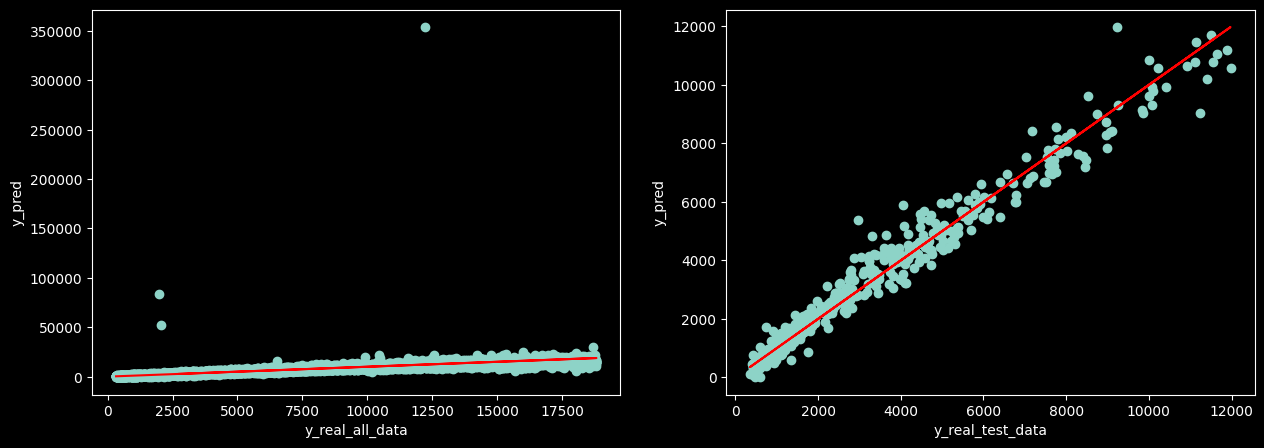

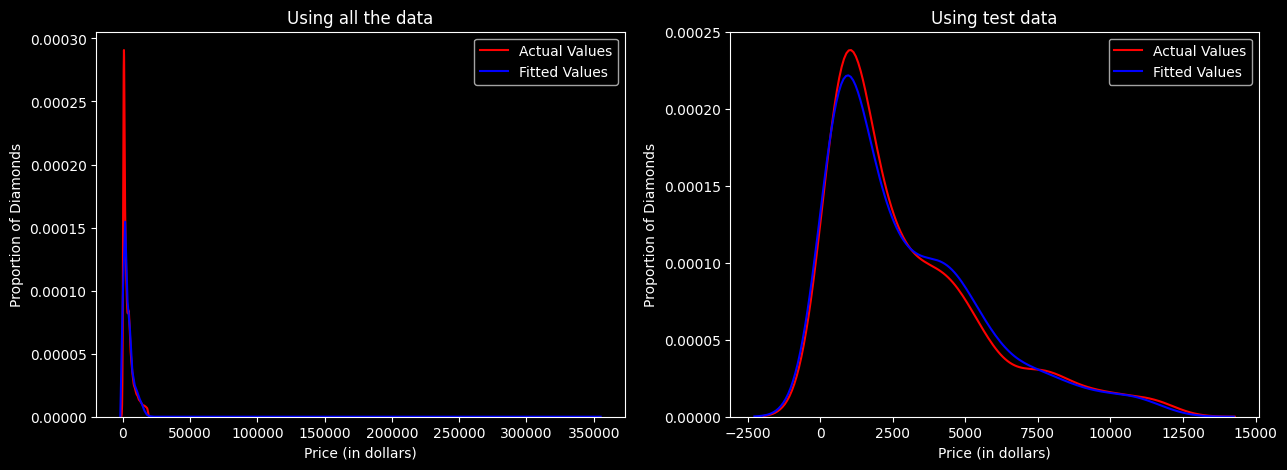

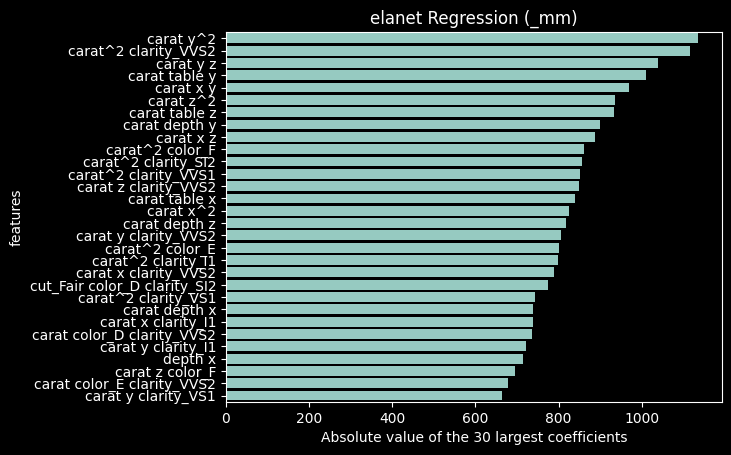

r2_score, training data =  0.980087327611709
r2_score, test data =  0.971332087621891
r2_score, all data =  0.812947499583192
mean squared error, test data =  204454.016069116
mean squared error, all data=  2975025.3663626695


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        3.279568      0.110548         0.018326        0.001090   
10       3.322880      0.117495         0.017096        0.000798   
2        3.410182      0.029052         0.017958        0.001625   
38       3.489858      0.082052         0.016369        0.000929   

    param_model__alpha  param_model__l1_ratio  param_polynomial__degree  \
6                0.001                   0.25                         3   
10               0.001                   0.50                         3   
2                0.001                   0.10                         3   
38               0.010                   0.90                         3   

                                               params  split0_test_score  \
6   {'model__alpha': 0.001, 'model__l1_ratio': 0.2...           0.961422   
10  {'model__alpha': 0.001, 'model__l1_ratio': 0.5...           0.961513   
2   {'model__alpha': 0.001, 'model__l1_ratio': 0.1...           0.961624   
38  {'model__alpha': 0.01, 'model__l1_ratio': 0.9,...           0.962246   

    split1_test_score  split2_test_score  split3_test_score  \
6            0.977074           0.960776           0.962143   
10           0.978241           0.960555           0.959758   
2            0.976357           0.960799           0.962500   
38           0.975935           0.960798           0.962678   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
6            0.958828         0.964049        0.006606                1  
10           0.959563         0.963926        0.007190                2  
2            0.958031         0.963862        0.006424                3  
38           0.957488         0.963829        0.006321                4

In [36]:
Input_elanetreg_mm = [('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), 
                     ('mm', MinMaxScaler()), 
                     ('model', ElasticNet(alpha=1, l1_ratio=0.5)) ]
pipe_elanetreg_mm = Pipeline( Input_elanetreg_mm)

param_grid_elanetreg = {"polynomial__degree": [1,2,3,4], 
                       "model__alpha":[0.001,0.01,0.1,1,10,100], 
                       "model__l1_ratio":[0.1,0.25,0.5,0.75,0.9]}
gsearch_elanetreg_mm = GridSearchCV(pipe_elanetreg_mm, param_grid_elanetreg, n_jobs=4, cv=5)

gsearch_elanetreg_mm.fit(X_train, y_train)

print('Best model: ', gsearch_elanetreg_mm.best_params_)
print('Best_mean_test_score: ', gsearch_elanetreg_mm.best_score_)

#using the best model
best_elanetreg_mm = gsearch_elanetreg_mm.best_estimator_
##print(best_elanetreg)
best_elanetreg_mm.fit(X_train, y_train)
y_pred_elanetreg_mm = best_elanetreg_mm.predict(X_test)
y_pred_tot_elanetreg_mm = best_elanetreg_mm.predict(X_tot)

r2_train_elanetreg_mm = r2_score(y_train, best_elanetreg_mm.predict(X_train))
r2_test_elanetreg_mm = r2_score(y_test, y_pred_elanetreg_mm)
r2_tot_elanetreg_mm = r2_score(y_tot, y_pred_tot_elanetreg_mm)
mse_test_elanetreg_mm = mean_squared_error(y_test, y_pred_elanetreg_mm)
mse_tot_elanetreg_mm = mean_squared_error(y_tot, y_pred_tot_elanetreg_mm)

model.append("elanet_Regression (_mm)")
r2_test.append(r2_test_elanetreg_mm)
r2_total.append(r2_tot_elanetreg_mm)
mse_test.append(mse_test_elanetreg_mm)
mse_total.append(mse_tot_elanetreg_mm)

yreal_vs_ypred(y_pred_tot_elanetreg_mm, y_pred_elanetreg_mm)
plot_dis(y_tot, y_pred_tot_elanetreg_mm, y_test, y_pred_elanetreg_mm)
plot_coef(best_elanetreg_mm, name = 'elanet Regression (_mm)')
print('r2_score, training data = ', r2_train_elanetreg_mm)
print('r2_score, test data = ', r2_test_elanetreg_mm)
print('r2_score, all data = ', r2_tot_elanetreg_mm)
print('mean squared error, test data = ', mse_test_elanetreg_mm)
print('mean squared error, all data= ', mse_tot_elanetreg_mm)
pd.DataFrame(gsearch_elanetreg_mm.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)


## 5. Summary of results <a class='anchor' id='results'></a>


#### summary

In [37]:
results = pd.DataFrame({'model': model, 
                        'r2_test': r2_test,
                        'r2_total': r2_total,
                        'mse_test': mse_test,
                        'mse_total': mse_total
                       }
                      )

results

model   r2_test  r2_total      mse_test     mse_total
0           Poly_Reg (_ss)  0.823436  0.827593  1.259220e+06  2.742099e+06
1           Poly_Reg (_mm)  0.823436  0.827593  1.259220e+06  2.742099e+06
2   Ridge_Regression (_ss)  0.971274  0.937074  2.048683e+05  1.000819e+06
3   Ridge_Regression (_mm)  0.971610  0.703308  2.024752e+05  4.718812e+06
4   lasso_Regression (_ss)  0.970869  0.919219  2.077545e+05  1.284810e+06
5   lasso_Regression (_mm)  0.971361  0.872968  2.042479e+05  2.020413e+06
6  elanet_Regression (_ss)  0.970166  0.947455  2.127692e+05  8.357145e+05
7  elanet_Regression (_mm)  0.971332  0.812947  2.044540e+05  2.975025e+06

In [38]:
##ploting the results
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


chart1 = go.Scatter(x=results['model'], y=results['r2_total'], mode ='markers+lines', name='r2, all data')
chart2 = go.Scatter(x=results['model'], y=results['r2_test'], mode = 'markers+lines', name='r2, test data')

chart3 = go.Scatter(x=results['model'], y=results['mse_total'], mode='markers+lines', name='mse, all data')
chart4 = go.Scatter(x=results['model'], y=results['mse_test'], mode='markers+lines', name='mse, test data')

fig =make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=['r2_scores', 'Mean Squres Errors'])
fig.append_trace(chart1, row=1,col=1)
fig.append_trace(chart2, row=1, col=1)
fig.append_trace(chart3, row=2,col=1)
fig.append_trace(chart4, row=2,col=1)

fig.show()

#### **Best model is Elastice Net, using StandarScaler()**

In [39]:
print(gsearch_elanetreg_ss.best_params_)
print(gsearch_elanetreg_ss.best_estimator_)

{'model__alpha': 0.01, 'model__l1_ratio': 0.25, 'polynomial__degree': 2}
Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('model', ElasticNet(alpha=0.01, l1_ratio=0.25))])


In [40]:
Input_best_model = [('polynomial', PolynomialFeatures(degree=2, include_bias=False) ), 
                     ('ss', StandardScaler()), 
                     ('model', ElasticNet(alpha=0.01, l1_ratio=0.25)) ]
pipe_best_model = Pipeline( Input_best_model)

pipe_best_model.fit(X_train, y_train)
y_pred_best_model = pipe_best_model.predict(X_tot)
print('r2_score, all data, best model = ',r2_score(y_tot, y_pred_best_model))
print('mse, all data, best model = ', mean_squared_error(y_tot, y_pred_best_model))

r2_score, all data, best model =  0.9474550764340405
mse, all data, best model =  835714.4659065488


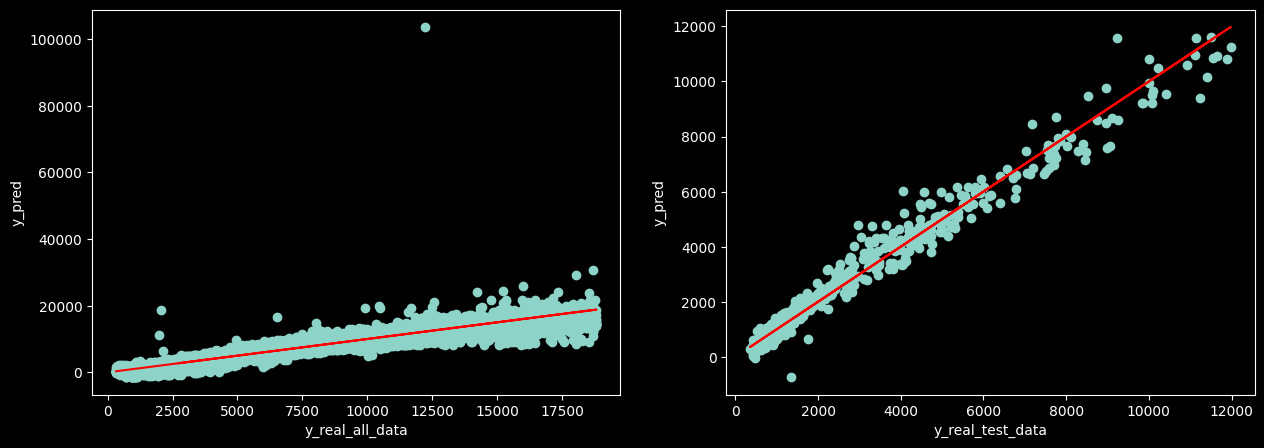

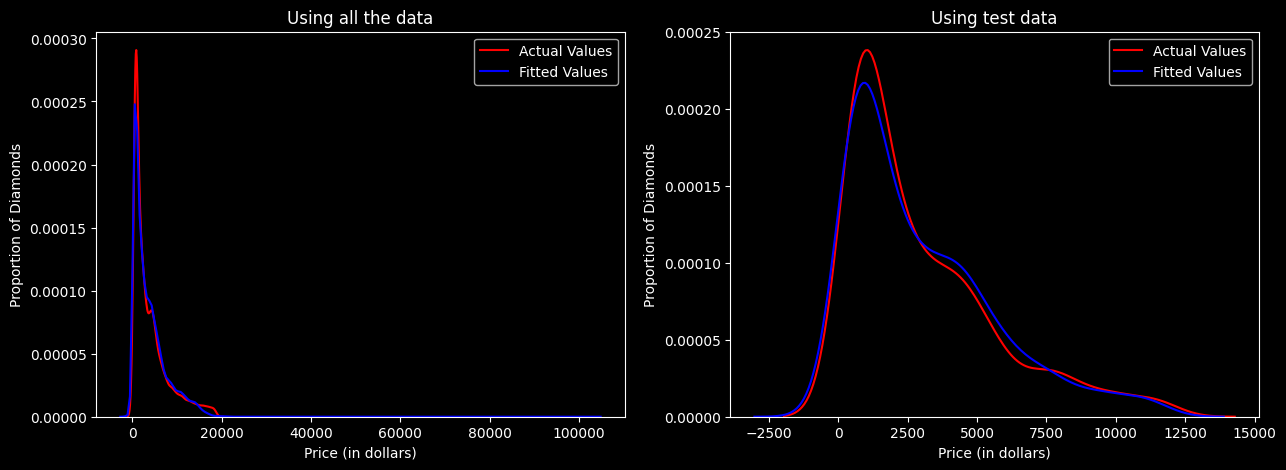

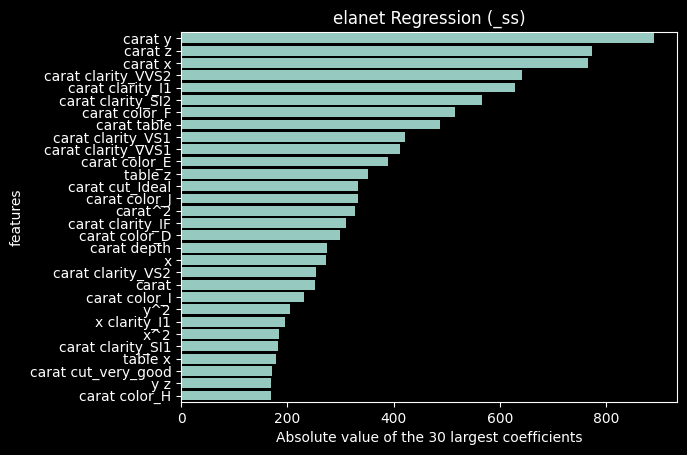

r2_score, training data =  0.9730483790216541
r2_score, test data =  0.9701661518247917
r2_score, all data =  0.9474550764340405
mean squared error, test data =  212769.24506282975
mean squared error, all data=  835714.4659065488


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
25       0.452022      0.052386         0.006052        0.000321   
21       0.457028      0.025967         0.005869        0.000404   
57       0.433873      0.026995         0.006470        0.000543   
78       3.278798      0.306237         0.018123        0.001905   

    param_model__alpha  param_model__l1_ratio  param_polynomial__degree  \
25                0.01                   0.25                         2   
21                0.01                   0.10                         2   
57                0.10                   0.90                         2   
78                1.00                   0.90                         3   

                                               params  split0_test_score  \
25  {'model__alpha': 0.01, 'model__l1_ratio': 0.25...           0.963720   
21  {'model__alpha': 0.01, 'model__l1_ratio': 0.1,...           0.962870   
57  {'model__alpha': 0.1, 'model__l1_ratio': 0.9, ...           0.962308   
78  {'model__alpha': 1, 'model__l1_ratio': 0.9, 'p...           0.956981   

    split1_test_score  split2_test_score  split3_test_score  \
25           0.974964           0.962156           0.953243   
21           0.974125           0.961422           0.955361   
57           0.973653           0.961123           0.956703   
78           0.976487           0.959172           0.960639   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
25           0.954196         0.961656        0.007849                1  
21           0.953210         0.961398        0.007316                2  
57           0.952933         0.961344        0.006997                3  
78           0.953051         0.961266        0.008029                4

In [41]:
yreal_vs_ypred(y_pred_tot_elanetreg_ss, y_pred_elanetreg_ss)
plot_dis(y_tot, y_pred_tot_elanetreg_ss, y_test, y_pred_elanetreg_ss)
plot_coef(best_elanetreg_ss, name = 'elanet Regression (_ss)')
print('r2_score, training data = ', r2_train_elanetreg_ss)
print('r2_score, test data = ', r2_test_elanetreg_ss)
print('r2_score, all data = ', r2_tot_elanetreg_ss)
print('mean squared error, test data = ', mse_test_elanetreg_ss)
print('mean squared error, all data= ', mse_tot_elanetreg_ss)
#pd.DataFrame(gsearch_elanetreg_ss.cv_results_).sort_values(by='rank_test_score', ascending=True).head(4)

## 6. Conclusion <a id='conclusion'></a>


We used a dataset containing different features of diamons to predict their price. To this end, we trained different regression models: Polynomial regression, Ridge Regression, Lasso Regression, Elastic Net. To tuned the hyperparameters of the model we performed 5-fold cross validation. 

Our results yield as the best model an elastic net regression, fitting a polynomial of degree=2, with hypeparameters $\alpha = 0.1$ and $l1_{ratio} = 0.25$. 

One of the main difficulties found in this work was the lack of RAM memory, the computations were performed in a machine with 16gb of ram memory. Taking into account that the dataset consists of 53,940 entries across 10 columns, runing the computations in parallel require to allocate enough memory (specially when working with polynomial features). To deal with this issue we have taken a small random sample of the data to be able to train the models with the limited amount of ram memory available, then we tested the model with a test set and with the whole dataset. The model considered as the best, mentioned the previous paragraph, seem to perfom well in the whole data yielding a r2_score = 0.94, when tested with the whole data, and yielding the minimum mean_squared_error among the models tested.